In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/StudyData/Concrete_Data.csv')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df = df.rename(columns = {'Cement (component 1)(kg in a m^3 mixture)' : 'Cement',
                         'Blast Furnace Slag (component 2)(kg in a m^3 mixture)' : 'Blast_Furnace_Slag',
                         'Fly Ash (component 3)(kg in a m^3 mixture)' : 'Fly_Ash',
                         'Water  (component 4)(kg in a m^3 mixture)' : 'Water',
                         'Superplasticizer (component 5)(kg in a m^3 mixture)' : 'Superplasticizer',
                         'Coarse Aggregate  (component 6)(kg in a m^3 mixture)' : 'Coarse_Aggregate',
                         'Fine Aggregate (component 7)(kg in a m^3 mixture)' : 'Fine_Aggregate',
                         'Age (day)' : 'Age', 
                         'Concrete compressive strength(MPa, megapascals) ' : 'Strength'})

In [ ]:
df.columns

Index(['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age', 'Strength'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast_Furnace_Slag  1030 non-null   float64
 2   Fly_Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse_Aggregate    1030 non-null   float64
 6   Fine_Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
X = df.drop(['Strength'],axis=1)
y = df['Strength']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y,
                                                            test_size = 0.2, 
                                                            random_state = 0)
print(f'Train : {X_train_val.shape}, Test : {X_test.shape}')

Train : (824, 8), Test : (206, 8)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, 
                                                  test_size = 0.2, random_state = 0)
print(f'Train : {X_train.shape}, Test : {X_val.shape}')

Train : (659, 8), Test : (165, 8)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
regressor = Sequential()
regressor.add(Dense(16,activation='relu',input_dim=X_train.shape[1]))
regressor.add(Dense(1))

In [ ]:
regressor.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 16)                144       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
regressor.compile(loss='mse',optimizer='adam',metrics='mae')

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

early_stop = EarlyStopping(monitor='val_mse',patience=20,mode='min',verbose=1)
checkpoint = ModelCheckpoint('/content/gdrive/My Drive/Temp/concrete_weights-{epoch:02d}-{val_loss:.3f}.hdf5',
                              monitor='val_loss',verbose=1,mode='min',
                              save_best_only=True)
callbacks_list=[early_stop,checkpoint]

In [ ]:
regressor_history = regressor.fit(X_train, y_train, batch_size=40,
                      validation_data=(X_val,y_val), callbacks=callbacks_list, epochs=350)

Epoch 1/350
 1/17 [>.............................] - ETA: 8s - loss: 1659.2493 - mae: 37.6549


Epoch 1: val_loss improved from inf to 1450.82263, saving model to /content/gdrive/My Drive/Temp/concrete_weights-01-1450.823.hdf5
17/17 [==============================] - 1s 16ms/step - loss: 1647.1702 - mae: 36.8604 - val_loss: 1450.8226 - val_mae: 34.6319
Epoch 2/350
 1/17 [>.............................] - ETA: 0s - loss: 1757.2520 - mae: 38.4315


Epoch 2: val_loss improved from 1450.82263 to 1431.46814, saving model to /content/gdrive/My Drive/Temp/concrete_weights-02-1431.468.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 1626.3298 - mae: 36.5834 - val_loss: 1431.4681 - val_mae: 34.3609
Epoch 3/350
 1/17 [>.............................] - ETA: 0s - loss: 1062.9951 - mae: 29.6420


Epoch 3: val_loss improved from 1431.46814 to 1412.61133, saving model to /content/gdrive/My Drive/Temp/concrete_weights-03-1412.611.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 1605.6794 - mae: 36.3135 - val_loss: 1412.6113 - val_mae: 34.0923
Epoch 4/350
 1/17 [>.............................] - ETA: 0s - loss: 1456.2092 - mae: 34.7524


Epoch 4: val_loss improved from 1412.61133 to 1393.14087, saving model to /content/gdrive/My Drive/Temp/concrete_weights-04-1393.141.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 1585.5800 - mae: 36.0374 - val_loss: 1393.1409 - val_mae: 33.8110
Epoch 5/350
 1/17 [>.............................] - ETA: 0s - loss: 1672.2156 - mae: 36.2233


Epoch 5: val_loss improved from 1393.14087 to 1373.34546, saving model to /content/gdrive/My Drive/Temp/concrete_weights-05-1373.345.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 1564.6377 - mae: 35.7534 - val_loss: 1373.3455 - val_mae: 33.5220
Epoch 6/350
 1/17 [>.............................] - ETA: 0s - loss: 1249.9520 - mae: 31.8114


Epoch 6: val_loss improved from 1373.34546 to 1352.45630, saving model to /content/gdrive/My Drive/Temp/concrete_weights-06-1352.456.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 1542.8378 - mae: 35.4556 - val_loss: 1352.4563 - val_mae: 33.2147
Epoch 7/350
 1/17 [>.............................] - ETA: 0s - loss: 1845.4352 - mae: 38.1680


Epoch 7: val_loss improved from 1352.45630 to 1330.41467, saving model to /content/gdrive/My Drive/Temp/concrete_weights-07-1330.415.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 1520.2764 - mae: 35.1387 - val_loss: 1330.4147 - val_mae: 32.8878
Epoch 8/350
 1/17 [>.............................] - ETA: 0s - loss: 1661.0609 - mae: 37.4695


Epoch 8: val_loss improved from 1330.41467 to 1307.16272, saving model to /content/gdrive/My Drive/Temp/concrete_weights-08-1307.163.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 1496.2482 - mae: 34.8021 - val_loss: 1307.1627 - val_mae: 32.5393
Epoch 9/350
 1/17 [>.............................] - ETA: 0s - loss: 1535.2399 - mae: 35.3978


Epoch 9: val_loss improved from 1307.16272 to 1282.32153, saving model to /content/gdrive/My Drive/Temp/concrete_weights-09-1282.322.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 1470.7494 - mae: 34.4398 - val_loss: 1282.3215 - val_mae: 32.1624
Epoch 10/350
 1/17 [>.............................] - ETA: 0s - loss: 1147.1781 - mae: 31.2073


Epoch 10: val_loss improved from 1282.32153 to 1256.25720, saving model to /content/gdrive/My Drive/Temp/concrete_weights-10-1256.257.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 1443.8280 - mae: 34.0524 - val_loss: 1256.2572 - val_mae: 31.7613
Epoch 11/350
 1/17 [>.............................] - ETA: 0s - loss: 1505.7502 - mae: 34.6805


Epoch 11: val_loss improved from 1256.25720 to 1229.31934, saving model to /content/gdrive/My Drive/Temp/concrete_weights-11-1229.319.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 1415.5840 - mae: 33.6423 - val_loss: 1229.3193 - val_mae: 31.3416
Epoch 12/350
 1/17 [>.............................] - ETA: 0s - loss: 1401.1960 - mae: 34.0056


Epoch 12: val_loss improved from 1229.31934 to 1201.19128, saving model to /content/gdrive/My Drive/Temp/concrete_weights-12-1201.191.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 1386.1359 - mae: 33.2119 - val_loss: 1201.1913 - val_mae: 30.8976
Epoch 13/350
 1/17 [>.............................] - ETA: 0s - loss: 1413.9646 - mae: 33.6470


Epoch 13: val_loss improved from 1201.19128 to 1171.83325, saving model to /content/gdrive/My Drive/Temp/concrete_weights-13-1171.833.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 1355.4764 - mae: 32.7564 - val_loss: 1171.8333 - val_mae: 30.4277
Epoch 14/350
 1/17 [>.............................] - ETA: 0s - loss: 1482.4873 - mae: 34.4633


Epoch 14: val_loss improved from 1171.83325 to 1141.25720, saving model to /content/gdrive/My Drive/Temp/concrete_weights-14-1141.257.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 1323.9103 - mae: 32.2740 - val_loss: 1141.2572 - val_mae: 29.9355
Epoch 15/350
 1/17 [>.............................] - ETA: 0s - loss: 1213.9762 - mae: 30.0941


Epoch 15: val_loss improved from 1141.25720 to 1110.38123, saving model to /content/gdrive/My Drive/Temp/concrete_weights-15-1110.381.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 1290.7996 - mae: 31.7724 - val_loss: 1110.3812 - val_mae: 29.4302
Epoch 16/350
 1/17 [>.............................] - ETA: 0s - loss: 1309.0437 - mae: 30.4319


Epoch 16: val_loss improved from 1110.38123 to 1078.65063, saving model to /content/gdrive/My Drive/Temp/concrete_weights-16-1078.651.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 1257.2727 - mae: 31.2525 - val_loss: 1078.6506 - val_mae: 28.9016
Epoch 17/350
 1/17 [>.............................] - ETA: 0s - loss: 1207.9818 - mae: 30.9359


Epoch 17: val_loss improved from 1078.65063 to 1046.28406, saving model to /content/gdrive/My Drive/Temp/concrete_weights-17-1046.284.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 1223.0146 - mae: 30.7080 - val_loss: 1046.2841 - val_mae: 28.3571
Epoch 18/350
 1/17 [>.............................] - ETA: 0s - loss: 1295.4766 - mae: 31.8731


Epoch 18: val_loss improved from 1046.28406 to 1013.43903, saving model to /content/gdrive/My Drive/Temp/concrete_weights-18-1013.439.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 1187.7112 - mae: 30.1471 - val_loss: 1013.4390 - val_mae: 27.7947
Epoch 19/350
 1/17 [>.............................] - ETA: 0s - loss: 1172.4465 - mae: 29.4512


Epoch 19: val_loss improved from 1013.43903 to 979.72528, saving model to /content/gdrive/My Drive/Temp/concrete_weights-19-979.725.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 1152.2804 - mae: 29.5610 - val_loss: 979.7253 - val_mae: 27.2069
Epoch 20/350
 1/17 [>.............................] - ETA: 0s - loss: 963.7108 - mae: 26.8104


Epoch 20: val_loss improved from 979.72528 to 945.66986, saving model to /content/gdrive/My Drive/Temp/concrete_weights-20-945.670.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 1116.1766 - mae: 28.9557 - val_loss: 945.6699 - val_mae: 26.6048
Epoch 21/350
 1/17 [>.............................] - ETA: 0s - loss: 1094.6064 - mae: 28.6260


Epoch 21: val_loss improved from 945.66986 to 911.74780, saving model to /content/gdrive/My Drive/Temp/concrete_weights-21-911.748.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 1079.2949 - mae: 28.3316 - val_loss: 911.7478 - val_mae: 25.9963
Epoch 22/350
 1/17 [>.............................] - ETA: 0s - loss: 1009.8949 - mae: 27.2801


Epoch 22: val_loss improved from 911.74780 to 877.98834, saving model to /content/gdrive/My Drive/Temp/concrete_weights-22-877.988.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 1042.4207 - mae: 27.7066 - val_loss: 877.9883 - val_mae: 25.3776
Epoch 23/350
 1/17 [>.............................] - ETA: 0s - loss: 667.9208 - mae: 21.5611


Epoch 23: val_loss improved from 877.98834 to 843.66174, saving model to /content/gdrive/My Drive/Temp/concrete_weights-23-843.662.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 1005.8762 - mae: 27.0692 - val_loss: 843.6617 - val_mae: 24.7322
Epoch 24/350
 1/17 [>.............................] - ETA: 0s - loss: 1031.2006 - mae: 27.0195


Epoch 24: val_loss improved from 843.66174 to 810.03656, saving model to /content/gdrive/My Drive/Temp/concrete_weights-24-810.037.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 969.0495 - mae: 26.4181 - val_loss: 810.0366 - val_mae: 24.0917
Epoch 25/350
 1/17 [>.............................] - ETA: 0s - loss: 741.9520 - mae: 23.9351


Epoch 25: val_loss improved from 810.03656 to 776.67749, saving model to /content/gdrive/My Drive/Temp/concrete_weights-25-776.677.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 932.5555 - mae: 25.7751 - val_loss: 776.6775 - val_mae: 23.4521
Epoch 26/350
 1/17 [>.............................] - ETA: 0s - loss: 766.7665 - mae: 23.5153


Epoch 26: val_loss improved from 776.67749 to 743.74146, saving model to /content/gdrive/My Drive/Temp/concrete_weights-26-743.741.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 896.5453 - mae: 25.1222 - val_loss: 743.7415 - val_mae: 22.8205
Epoch 27/350
 1/17 [>.............................] - ETA: 0s - loss: 854.5426 - mae: 24.7266


Epoch 27: val_loss improved from 743.74146 to 711.17896, saving model to /content/gdrive/My Drive/Temp/concrete_weights-27-711.179.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 860.5529 - mae: 24.4689 - val_loss: 711.1790 - val_mae: 22.1970
Epoch 28/350
 1/17 [>.............................] - ETA: 0s - loss: 1226.7913 - mae: 29.8947


Epoch 28: val_loss improved from 711.17896 to 678.74628, saving model to /content/gdrive/My Drive/Temp/concrete_weights-28-678.746.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 825.3434 - mae: 23.8189 - val_loss: 678.7463 - val_mae: 21.5713
Epoch 29/350
 1/17 [>.............................] - ETA: 0s - loss: 599.8522 - mae: 21.7336


Epoch 29: val_loss improved from 678.74628 to 647.42932, saving model to /content/gdrive/My Drive/Temp/concrete_weights-29-647.429.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 790.1796 - mae: 23.1918 - val_loss: 647.4293 - val_mae: 20.9634
Epoch 30/350
 1/17 [>.............................] - ETA: 0s - loss: 707.5405 - mae: 21.8093


Epoch 30: val_loss improved from 647.42932 to 616.94550, saving model to /content/gdrive/My Drive/Temp/concrete_weights-30-616.945.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 756.0089 - mae: 22.5678 - val_loss: 616.9455 - val_mae: 20.3785
Epoch 31/350
 1/17 [>.............................] - ETA: 0s - loss: 505.6684 - mae: 18.2537


Epoch 31: val_loss improved from 616.94550 to 587.61334, saving model to /content/gdrive/My Drive/Temp/concrete_weights-31-587.613.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 722.9865 - mae: 21.9616 - val_loss: 587.6133 - val_mae: 19.8141
Epoch 32/350
 1/17 [>.............................] - ETA: 0s - loss: 787.9620 - mae: 22.9634


Epoch 32: val_loss improved from 587.61334 to 559.05206, saving model to /content/gdrive/My Drive/Temp/concrete_weights-32-559.052.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 690.9296 - mae: 21.3480 - val_loss: 559.0521 - val_mae: 19.2514
Epoch 33/350
 1/17 [>.............................] - ETA: 0s - loss: 604.6714 - mae: 19.5867


Epoch 33: val_loss improved from 559.05206 to 531.50629, saving model to /content/gdrive/My Drive/Temp/concrete_weights-33-531.506.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 659.9596 - mae: 20.7670 - val_loss: 531.5063 - val_mae: 18.6946
Epoch 34/350
 1/17 [>.............................] - ETA: 0s - loss: 509.9536 - mae: 17.3374


Epoch 34: val_loss improved from 531.50629 to 505.55304, saving model to /content/gdrive/My Drive/Temp/concrete_weights-34-505.553.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 629.5603 - mae: 20.1971 - val_loss: 505.5530 - val_mae: 18.1680
Epoch 35/350
 1/17 [>.............................] - ETA: 0s - loss: 658.8110 - mae: 19.5302


Epoch 35: val_loss improved from 505.55304 to 480.42770, saving model to /content/gdrive/My Drive/Temp/concrete_weights-35-480.428.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 600.9796 - mae: 19.6459 - val_loss: 480.4277 - val_mae: 17.6500
Epoch 36/350
 1/17 [>.............................] - ETA: 0s - loss: 585.1351 - mae: 20.6899


Epoch 36: val_loss improved from 480.42770 to 456.41107, saving model to /content/gdrive/My Drive/Temp/concrete_weights-36-456.411.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 573.6960 - mae: 19.1189 - val_loss: 456.4111 - val_mae: 17.1460
Epoch 37/350
 1/17 [>.............................] - ETA: 0s - loss: 794.0697 - mae: 23.3868


Epoch 37: val_loss improved from 456.41107 to 434.18826, saving model to /content/gdrive/My Drive/Temp/concrete_weights-37-434.188.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 547.2487 - mae: 18.6018 - val_loss: 434.1883 - val_mae: 16.6702
Epoch 38/350
 1/17 [>.............................] - ETA: 0s - loss: 470.6281 - mae: 18.0675


Epoch 38: val_loss improved from 434.18826 to 412.96686, saving model to /content/gdrive/My Drive/Temp/concrete_weights-38-412.967.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 522.3239 - mae: 18.0958 - val_loss: 412.9669 - val_mae: 16.2121
Epoch 39/350
 1/17 [>.............................] - ETA: 0s - loss: 500.3162 - mae: 17.5992


Epoch 39: val_loss improved from 412.96686 to 393.14001, saving model to /content/gdrive/My Drive/Temp/concrete_weights-39-393.140.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 498.4091 - mae: 17.6098 - val_loss: 393.1400 - val_mae: 15.7745
Epoch 40/350
 1/17 [>.............................] - ETA: 0s - loss: 651.4611 - mae: 21.1288


Epoch 40: val_loss improved from 393.14001 to 374.16406, saving model to /content/gdrive/My Drive/Temp/concrete_weights-40-374.164.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 476.2040 - mae: 17.1453 - val_loss: 374.1641 - val_mae: 15.3632
Epoch 41/350
 1/17 [>.............................] - ETA: 0s - loss: 581.4398 - mae: 18.9616


Epoch 41: val_loss improved from 374.16406 to 356.51642, saving model to /content/gdrive/My Drive/Temp/concrete_weights-41-356.516.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 455.0436 - mae: 16.7082 - val_loss: 356.5164 - val_mae: 14.9769
Epoch 42/350
 1/17 [>.............................] - ETA: 0s - loss: 491.5190 - mae: 18.4675


Epoch 42: val_loss improved from 356.51642 to 340.19791, saving model to /content/gdrive/My Drive/Temp/concrete_weights-42-340.198.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 434.8957 - mae: 16.2822 - val_loss: 340.1979 - val_mae: 14.6069
Epoch 43/350
 1/17 [>.............................] - ETA: 0s - loss: 386.2003 - mae: 15.3067


Epoch 43: val_loss improved from 340.19791 to 325.31638, saving model to /content/gdrive/My Drive/Temp/concrete_weights-43-325.316.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 416.5203 - mae: 15.8925 - val_loss: 325.3164 - val_mae: 14.2921
Epoch 44/350
 1/17 [>.............................] - ETA: 0s - loss: 258.9778 - mae: 12.3943


Epoch 44: val_loss improved from 325.31638 to 311.92581, saving model to /content/gdrive/My Drive/Temp/concrete_weights-44-311.926.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 399.4061 - mae: 15.5431 - val_loss: 311.9258 - val_mae: 14.0244
Epoch 45/350
 1/17 [>.............................] - ETA: 0s - loss: 497.4126 - mae: 18.3945


Epoch 45: val_loss improved from 311.92581 to 299.49124, saving model to /content/gdrive/My Drive/Temp/concrete_weights-45-299.491.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 383.6233 - mae: 15.2132 - val_loss: 299.4912 - val_mae: 13.7678
Epoch 46/350
 1/17 [>.............................] - ETA: 0s - loss: 535.8074 - mae: 18.0500


Epoch 46: val_loss improved from 299.49124 to 287.99307, saving model to /content/gdrive/My Drive/Temp/concrete_weights-46-287.993.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 368.9604 - mae: 14.9059 - val_loss: 287.9931 - val_mae: 13.5249
Epoch 47/350
 1/17 [>.............................] - ETA: 0s - loss: 180.5798 - mae: 10.6391


Epoch 47: val_loss improved from 287.99307 to 277.48969, saving model to /content/gdrive/My Drive/Temp/concrete_weights-47-277.490.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 355.2452 - mae: 14.6271 - val_loss: 277.4897 - val_mae: 13.2993
Epoch 48/350
 1/17 [>.............................] - ETA: 0s - loss: 425.0264 - mae: 15.8763


Epoch 48: val_loss improved from 277.48969 to 268.02719, saving model to /content/gdrive/My Drive/Temp/concrete_weights-48-268.027.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 342.8609 - mae: 14.3751 - val_loss: 268.0272 - val_mae: 13.1033
Epoch 49/350
 1/17 [>.............................] - ETA: 0s - loss: 364.9640 - mae: 15.5417


Epoch 49: val_loss improved from 268.02719 to 259.61850, saving model to /content/gdrive/My Drive/Temp/concrete_weights-49-259.618.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 331.3194 - mae: 14.1345 - val_loss: 259.6185 - val_mae: 12.9160
Epoch 50/350
 1/17 [>.............................] - ETA: 0s - loss: 347.4355 - mae: 14.4909


Epoch 50: val_loss improved from 259.61850 to 252.09392, saving model to /content/gdrive/My Drive/Temp/concrete_weights-50-252.094.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 321.1213 - mae: 13.9320 - val_loss: 252.0939 - val_mae: 12.7339
Epoch 51/350
 1/17 [>.............................] - ETA: 0s - loss: 259.1848 - mae: 11.9770


Epoch 51: val_loss improved from 252.09392 to 245.69987, saving model to /content/gdrive/My Drive/Temp/concrete_weights-51-245.700.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 311.7951 - mae: 13.7410 - val_loss: 245.6999 - val_mae: 12.5694
Epoch 52/350
 1/17 [>.............................] - ETA: 0s - loss: 314.1500 - mae: 13.7957


Epoch 52: val_loss improved from 245.69987 to 239.98224, saving model to /content/gdrive/My Drive/Temp/concrete_weights-52-239.982.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 303.4733 - mae: 13.5825 - val_loss: 239.9822 - val_mae: 12.4113
Epoch 53/350
 1/17 [>.............................] - ETA: 0s - loss: 474.7288 - mae: 16.3181


Epoch 53: val_loss improved from 239.98224 to 234.86774, saving model to /content/gdrive/My Drive/Temp/concrete_weights-53-234.868.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 296.2275 - mae: 13.4322 - val_loss: 234.8677 - val_mae: 12.2659
Epoch 54/350
 1/17 [>.............................] - ETA: 0s - loss: 269.1357 - mae: 13.3231


Epoch 54: val_loss improved from 234.86774 to 230.68866, saving model to /content/gdrive/My Drive/Temp/concrete_weights-54-230.689.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 289.3063 - mae: 13.3012 - val_loss: 230.6887 - val_mae: 12.1414
Epoch 55/350
 1/17 [>.............................] - ETA: 0s - loss: 216.9530 - mae: 11.3217


Epoch 55: val_loss improved from 230.68866 to 226.98944, saving model to /content/gdrive/My Drive/Temp/concrete_weights-55-226.989.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 283.4221 - mae: 13.1889 - val_loss: 226.9894 - val_mae: 12.0267
Epoch 56/350
 1/17 [>.............................] - ETA: 0s - loss: 333.3666 - mae: 14.7526


Epoch 56: val_loss improved from 226.98944 to 223.38976, saving model to /content/gdrive/My Drive/Temp/concrete_weights-56-223.390.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 278.2312 - mae: 13.0948 - val_loss: 223.3898 - val_mae: 11.9130
Epoch 57/350
 1/17 [>.............................] - ETA: 0s - loss: 196.7391 - mae: 10.5535


Epoch 57: val_loss improved from 223.38976 to 220.60175, saving model to /content/gdrive/My Drive/Temp/concrete_weights-57-220.602.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 273.0510 - mae: 12.9819 - val_loss: 220.6017 - val_mae: 11.8300
Epoch 58/350
 1/17 [>.............................] - ETA: 0s - loss: 258.8466 - mae: 13.5769


Epoch 58: val_loss improved from 220.60175 to 218.26811, saving model to /content/gdrive/My Drive/Temp/concrete_weights-58-218.268.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 268.7981 - mae: 12.9013 - val_loss: 218.2681 - val_mae: 11.7667
Epoch 59/350
 1/17 [>.............................] - ETA: 0s - loss: 269.9066 - mae: 12.9312


Epoch 59: val_loss improved from 218.26811 to 216.29019, saving model to /content/gdrive/My Drive/Temp/concrete_weights-59-216.290.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 265.0132 - mae: 12.8239 - val_loss: 216.2902 - val_mae: 11.7124
Epoch 60/350
 1/17 [>.............................] - ETA: 0s - loss: 322.1041 - mae: 14.8197


Epoch 60: val_loss improved from 216.29019 to 214.49666, saving model to /content/gdrive/My Drive/Temp/concrete_weights-60-214.497.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 261.8094 - mae: 12.7575 - val_loss: 214.4967 - val_mae: 11.6662
Epoch 61/350
 1/17 [>.............................] - ETA: 0s - loss: 280.0789 - mae: 12.5736


Epoch 61: val_loss improved from 214.49666 to 213.07990, saving model to /content/gdrive/My Drive/Temp/concrete_weights-61-213.080.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 258.7830 - mae: 12.6931 - val_loss: 213.0799 - val_mae: 11.6262
Epoch 62/350
 1/17 [>.............................] - ETA: 0s - loss: 216.6546 - mae: 11.5756


Epoch 62: val_loss improved from 213.07990 to 211.94472, saving model to /content/gdrive/My Drive/Temp/concrete_weights-62-211.945.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 256.1003 - mae: 12.6350 - val_loss: 211.9447 - val_mae: 11.5989
Epoch 63/350
 1/17 [>.............................] - ETA: 0s - loss: 272.1672 - mae: 13.5220


Epoch 63: val_loss improved from 211.94472 to 210.86127, saving model to /content/gdrive/My Drive/Temp/concrete_weights-63-210.861.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 253.8574 - mae: 12.5953 - val_loss: 210.8613 - val_mae: 11.5806
Epoch 64/350
 1/17 [>.............................] - ETA: 0s - loss: 350.3989 - mae: 14.6219


Epoch 64: val_loss improved from 210.86127 to 209.98203, saving model to /content/gdrive/My Drive/Temp/concrete_weights-64-209.982.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 251.6805 - mae: 12.5499 - val_loss: 209.9820 - val_mae: 11.5646
Epoch 65/350
 1/17 [>.............................] - ETA: 0s - loss: 250.8512 - mae: 12.7937


Epoch 65: val_loss improved from 209.98203 to 209.23399, saving model to /content/gdrive/My Drive/Temp/concrete_weights-65-209.234.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 249.8074 - mae: 12.5192 - val_loss: 209.2340 - val_mae: 11.5523
Epoch 66/350
 1/17 [>.............................] - ETA: 0s - loss: 170.8040 - mae: 10.1090


Epoch 66: val_loss improved from 209.23399 to 208.61842, saving model to /content/gdrive/My Drive/Temp/concrete_weights-66-208.618.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 248.1510 - mae: 12.4936 - val_loss: 208.6184 - val_mae: 11.5479
Epoch 67/350
 1/17 [>.............................] - ETA: 0s - loss: 158.5011 - mae: 9.5083


Epoch 67: val_loss improved from 208.61842 to 208.08174, saving model to /content/gdrive/My Drive/Temp/concrete_weights-67-208.082.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 246.6877 - mae: 12.4732 - val_loss: 208.0817 - val_mae: 11.5437
Epoch 68/350
 1/17 [>.............................] - ETA: 0s - loss: 265.7018 - mae: 12.6703


Epoch 68: val_loss improved from 208.08174 to 207.59801, saving model to /content/gdrive/My Drive/Temp/concrete_weights-68-207.598.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 245.2544 - mae: 12.4509 - val_loss: 207.5980 - val_mae: 11.5404
Epoch 69/350
 1/17 [>.............................] - ETA: 0s - loss: 190.6988 - mae: 10.4176


Epoch 69: val_loss improved from 207.59801 to 207.15758, saving model to /content/gdrive/My Drive/Temp/concrete_weights-69-207.158.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 243.9746 - mae: 12.4302 - val_loss: 207.1576 - val_mae: 11.5372
Epoch 70/350
 1/17 [>.............................] - ETA: 0s - loss: 274.0354 - mae: 13.8146


Epoch 70: val_loss improved from 207.15758 to 206.76318, saving model to /content/gdrive/My Drive/Temp/concrete_weights-70-206.763.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 242.9069 - mae: 12.4131 - val_loss: 206.7632 - val_mae: 11.5384
Epoch 71/350
 1/17 [>.............................] - ETA: 0s - loss: 211.9065 - mae: 11.4382


Epoch 71: val_loss improved from 206.76318 to 206.36873, saving model to /content/gdrive/My Drive/Temp/concrete_weights-71-206.369.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 241.7049 - mae: 12.3925 - val_loss: 206.3687 - val_mae: 11.5335
Epoch 72/350
 1/17 [>.............................] - ETA: 0s - loss: 120.1040 - mae: 8.8183


Epoch 72: val_loss improved from 206.36873 to 205.97095, saving model to /content/gdrive/My Drive/Temp/concrete_weights-72-205.971.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 240.7503 - mae: 12.3749 - val_loss: 205.9709 - val_mae: 11.5283
Epoch 73/350
 1/17 [>.............................] - ETA: 0s - loss: 286.1664 - mae: 13.7970


Epoch 73: val_loss improved from 205.97095 to 205.65672, saving model to /content/gdrive/My Drive/Temp/concrete_weights-73-205.657.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 239.7898 - mae: 12.3634 - val_loss: 205.6567 - val_mae: 11.5282
Epoch 74/350
 1/17 [>.............................] - ETA: 0s - loss: 299.1646 - mae: 14.1736


Epoch 74: val_loss improved from 205.65672 to 205.32829, saving model to /content/gdrive/My Drive/Temp/concrete_weights-74-205.328.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 238.8734 - mae: 12.3526 - val_loss: 205.3283 - val_mae: 11.5258
Epoch 75/350
 1/17 [>.............................] - ETA: 0s - loss: 230.0886 - mae: 11.7338


Epoch 75: val_loss improved from 205.32829 to 204.97981, saving model to /content/gdrive/My Drive/Temp/concrete_weights-75-204.980.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 238.0446 - mae: 12.3398 - val_loss: 204.9798 - val_mae: 11.5218
Epoch 76/350
 1/17 [>.............................] - ETA: 0s - loss: 243.7280 - mae: 12.2037


Epoch 76: val_loss improved from 204.97981 to 204.59500, saving model to /content/gdrive/My Drive/Temp/concrete_weights-76-204.595.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 237.1614 - mae: 12.3259 - val_loss: 204.5950 - val_mae: 11.5148
Epoch 77/350
 1/17 [>.............................] - ETA: 0s - loss: 317.1758 - mae: 14.6470


Epoch 77: val_loss improved from 204.59500 to 204.14560, saving model to /content/gdrive/My Drive/Temp/concrete_weights-77-204.146.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 236.3633 - mae: 12.3107 - val_loss: 204.1456 - val_mae: 11.5051
Epoch 78/350
 1/17 [>.............................] - ETA: 0s - loss: 281.7994 - mae: 13.9510


Epoch 78: val_loss improved from 204.14560 to 203.84752, saving model to /content/gdrive/My Drive/Temp/concrete_weights-78-203.848.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 235.5819 - mae: 12.2992 - val_loss: 203.8475 - val_mae: 11.5012
Epoch 79/350
 1/17 [>.............................] - ETA: 0s - loss: 186.7018 - mae: 11.8746


Epoch 79: val_loss improved from 203.84752 to 203.39594, saving model to /content/gdrive/My Drive/Temp/concrete_weights-79-203.396.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 234.7477 - mae: 12.2843 - val_loss: 203.3959 - val_mae: 11.4920
Epoch 80/350
 1/17 [>.............................] - ETA: 0s - loss: 305.9642 - mae: 14.4514


Epoch 80: val_loss improved from 203.39594 to 203.01872, saving model to /content/gdrive/My Drive/Temp/concrete_weights-80-203.019.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 233.9783 - mae: 12.2692 - val_loss: 203.0187 - val_mae: 11.4855
Epoch 81/350
 1/17 [>.............................] - ETA: 0s - loss: 219.9423 - mae: 12.2423


Epoch 81: val_loss improved from 203.01872 to 202.59955, saving model to /content/gdrive/My Drive/Temp/concrete_weights-81-202.600.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 233.1765 - mae: 12.2560 - val_loss: 202.5995 - val_mae: 11.4770
Epoch 82/350
 1/17 [>.............................] - ETA: 0s - loss: 217.3691 - mae: 11.7044


Epoch 82: val_loss improved from 202.59955 to 202.08757, saving model to /content/gdrive/My Drive/Temp/concrete_weights-82-202.088.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 232.4175 - mae: 12.2396 - val_loss: 202.0876 - val_mae: 11.4649
Epoch 83/350
 1/17 [>.............................] - ETA: 0s - loss: 241.1416 - mae: 12.2590


Epoch 83: val_loss improved from 202.08757 to 201.66556, saving model to /content/gdrive/My Drive/Temp/concrete_weights-83-201.666.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 231.6476 - mae: 12.2252 - val_loss: 201.6656 - val_mae: 11.4568
Epoch 84/350
 1/17 [>.............................] - ETA: 0s - loss: 204.5556 - mae: 11.1107


Epoch 84: val_loss improved from 201.66556 to 201.03743, saving model to /content/gdrive/My Drive/Temp/concrete_weights-84-201.037.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 230.8507 - mae: 12.2081 - val_loss: 201.0374 - val_mae: 11.4412
Epoch 85/350
 1/17 [>.............................] - ETA: 0s - loss: 253.5492 - mae: 13.1426


Epoch 85: val_loss improved from 201.03743 to 200.57863, saving model to /content/gdrive/My Drive/Temp/concrete_weights-85-200.579.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 230.0630 - mae: 12.1910 - val_loss: 200.5786 - val_mae: 11.4330
Epoch 86/350
 1/17 [>.............................] - ETA: 0s - loss: 287.8727 - mae: 12.7667


Epoch 86: val_loss improved from 200.57863 to 199.89702, saving model to /content/gdrive/My Drive/Temp/concrete_weights-86-199.897.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 229.2326 - mae: 12.1727 - val_loss: 199.8970 - val_mae: 11.4160
Epoch 87/350
 1/17 [>.............................] - ETA: 0s - loss: 204.2758 - mae: 11.6067


Epoch 87: val_loss improved from 199.89702 to 199.29671, saving model to /content/gdrive/My Drive/Temp/concrete_weights-87-199.297.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 228.3694 - mae: 12.1521 - val_loss: 199.2967 - val_mae: 11.4019
Epoch 88/350
 1/17 [>.............................] - ETA: 0s - loss: 164.8369 - mae: 10.5305


Epoch 88: val_loss improved from 199.29671 to 198.53854, saving model to /content/gdrive/My Drive/Temp/concrete_weights-88-198.539.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 227.5056 - mae: 12.1308 - val_loss: 198.5385 - val_mae: 11.3824
Epoch 89/350
 1/17 [>.............................] - ETA: 0s - loss: 200.7997 - mae: 10.8921


Epoch 89: val_loss improved from 198.53854 to 197.73889, saving model to /content/gdrive/My Drive/Temp/concrete_weights-89-197.739.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 226.6077 - mae: 12.1075 - val_loss: 197.7389 - val_mae: 11.3613
Epoch 90/350
 1/17 [>.............................] - ETA: 0s - loss: 245.2522 - mae: 13.0755


Epoch 90: val_loss improved from 197.73889 to 196.98993, saving model to /content/gdrive/My Drive/Temp/concrete_weights-90-196.990.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 225.6985 - mae: 12.0865 - val_loss: 196.9899 - val_mae: 11.3437
Epoch 91/350
 1/17 [>.............................] - ETA: 0s - loss: 199.8865 - mae: 11.1648


Epoch 91: val_loss improved from 196.98993 to 196.09894, saving model to /content/gdrive/My Drive/Temp/concrete_weights-91-196.099.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 224.7525 - mae: 12.0638 - val_loss: 196.0989 - val_mae: 11.3206
Epoch 92/350
 1/17 [>.............................] - ETA: 0s - loss: 218.3299 - mae: 12.2388


Epoch 92: val_loss improved from 196.09894 to 194.87280, saving model to /content/gdrive/My Drive/Temp/concrete_weights-92-194.873.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 223.6774 - mae: 12.0340 - val_loss: 194.8728 - val_mae: 11.2835
Epoch 93/350
 1/17 [>.............................] - ETA: 0s - loss: 226.5260 - mae: 12.7226


Epoch 93: val_loss improved from 194.87280 to 193.31079, saving model to /content/gdrive/My Drive/Temp/concrete_weights-93-193.311.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 222.5160 - mae: 11.9976 - val_loss: 193.3108 - val_mae: 11.2340
Epoch 94/350
 1/17 [>.............................] - ETA: 0s - loss: 213.4554 - mae: 12.2238


Epoch 94: val_loss improved from 193.31079 to 192.26466, saving model to /content/gdrive/My Drive/Temp/concrete_weights-94-192.265.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 221.1574 - mae: 11.9612 - val_loss: 192.2647 - val_mae: 11.2073
Epoch 95/350
 1/17 [>.............................] - ETA: 0s - loss: 225.7545 - mae: 12.5733


Epoch 95: val_loss improved from 192.26466 to 190.86473, saving model to /content/gdrive/My Drive/Temp/concrete_weights-95-190.865.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 219.8566 - mae: 11.9254 - val_loss: 190.8647 - val_mae: 11.1658
Epoch 96/350
 1/17 [>.............................] - ETA: 0s - loss: 243.0506 - mae: 12.7812


Epoch 96: val_loss improved from 190.86473 to 189.75102, saving model to /content/gdrive/My Drive/Temp/concrete_weights-96-189.751.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 218.4939 - mae: 11.8918 - val_loss: 189.7510 - val_mae: 11.1361
Epoch 97/350
 1/17 [>.............................] - ETA: 0s - loss: 257.5678 - mae: 13.0239


Epoch 97: val_loss improved from 189.75102 to 188.53761, saving model to /content/gdrive/My Drive/Temp/concrete_weights-97-188.538.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 217.1005 - mae: 11.8538 - val_loss: 188.5376 - val_mae: 11.1019
Epoch 98/350
 1/17 [>.............................] - ETA: 0s - loss: 234.0241 - mae: 11.6083


Epoch 98: val_loss improved from 188.53761 to 187.29633, saving model to /content/gdrive/My Drive/Temp/concrete_weights-98-187.296.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 215.7410 - mae: 11.8182 - val_loss: 187.2963 - val_mae: 11.0664
Epoch 99/350
 1/17 [>.............................] - ETA: 0s - loss: 192.9214 - mae: 10.8977


Epoch 99: val_loss improved from 187.29633 to 186.04605, saving model to /content/gdrive/My Drive/Temp/concrete_weights-99-186.046.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 214.3317 - mae: 11.7812 - val_loss: 186.0461 - val_mae: 11.0302
Epoch 100/350
 1/17 [>.............................] - ETA: 0s - loss: 201.4921 - mae: 11.5788


Epoch 100: val_loss improved from 186.04605 to 184.44946, saving model to /content/gdrive/My Drive/Temp/concrete_weights-100-184.449.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 212.8643 - mae: 11.7393 - val_loss: 184.4495 - val_mae: 10.9799
Epoch 101/350
 1/17 [>.............................] - ETA: 0s - loss: 189.1364 - mae: 10.6923


Epoch 101: val_loss improved from 184.44946 to 182.72583, saving model to /content/gdrive/My Drive/Temp/concrete_weights-101-182.726.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 211.2252 - mae: 11.6925 - val_loss: 182.7258 - val_mae: 10.9267
Epoch 102/350
 1/17 [>.............................] - ETA: 0s - loss: 210.4503 - mae: 11.8587


Epoch 102: val_loss improved from 182.72583 to 181.19278, saving model to /content/gdrive/My Drive/Temp/concrete_weights-102-181.193.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 209.4672 - mae: 11.6424 - val_loss: 181.1928 - val_mae: 10.8806
Epoch 103/350
 1/17 [>.............................] - ETA: 0s - loss: 170.2013 - mae: 11.0847


Epoch 103: val_loss improved from 181.19278 to 179.22980, saving model to /content/gdrive/My Drive/Temp/concrete_weights-103-179.230.hdf5
17/17 [==============================] - 0s 9ms/step - loss: 207.7572 - mae: 11.5911 - val_loss: 179.2298 - val_mae: 10.8138
Epoch 104/350
 1/17 [>.............................] - ETA: 0s - loss: 129.5380 - mae: 9.4796


Epoch 104: val_loss improved from 179.22980 to 177.58737, saving model to /content/gdrive/My Drive/Temp/concrete_weights-104-177.587.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 205.8410 - mae: 11.5407 - val_loss: 177.5874 - val_mae: 10.7659
Epoch 105/350
 1/17 [>.............................] - ETA: 0s - loss: 184.9191 - mae: 10.8862


Epoch 105: val_loss improved from 177.58737 to 175.74158, saving model to /content/gdrive/My Drive/Temp/concrete_weights-105-175.742.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 203.9598 - mae: 11.4899 - val_loss: 175.7416 - val_mae: 10.7081
Epoch 106/350
 1/17 [>.............................] - ETA: 0s - loss: 162.8540 - mae: 10.3500


Epoch 106: val_loss improved from 175.74158 to 174.10001, saving model to /content/gdrive/My Drive/Temp/concrete_weights-106-174.100.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 201.9699 - mae: 11.4331 - val_loss: 174.1000 - val_mae: 10.6594
Epoch 107/350
 1/17 [>.............................] - ETA: 0s - loss: 207.1063 - mae: 11.7256


Epoch 107: val_loss improved from 174.10001 to 172.46724, saving model to /content/gdrive/My Drive/Temp/concrete_weights-107-172.467.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 200.0584 - mae: 11.3832 - val_loss: 172.4672 - val_mae: 10.6117
Epoch 108/350
 1/17 [>.............................] - ETA: 0s - loss: 223.7264 - mae: 11.9575


Epoch 108: val_loss improved from 172.46724 to 170.34193, saving model to /content/gdrive/My Drive/Temp/concrete_weights-108-170.342.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 198.4517 - mae: 11.3307 - val_loss: 170.3419 - val_mae: 10.5344
Epoch 109/350
 1/17 [>.............................] - ETA: 0s - loss: 206.1030 - mae: 11.6452


Epoch 109: val_loss improved from 170.34193 to 169.08063, saving model to /content/gdrive/My Drive/Temp/concrete_weights-109-169.081.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 196.4018 - mae: 11.2754 - val_loss: 169.0806 - val_mae: 10.5034
Epoch 110/350
 1/17 [>.............................] - ETA: 0s - loss: 190.5576 - mae: 11.7338


Epoch 110: val_loss improved from 169.08063 to 167.80533, saving model to /content/gdrive/My Drive/Temp/concrete_weights-110-167.805.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 194.6898 - mae: 11.2358 - val_loss: 167.8053 - val_mae: 10.4725
Epoch 111/350
 1/17 [>.............................] - ETA: 0s - loss: 167.5866 - mae: 10.8993


Epoch 111: val_loss improved from 167.80533 to 166.21071, saving model to /content/gdrive/My Drive/Temp/concrete_weights-111-166.211.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 192.9076 - mae: 11.1897 - val_loss: 166.2107 - val_mae: 10.4228
Epoch 112/350
 1/17 [>.............................] - ETA: 0s - loss: 216.2023 - mae: 11.9745


Epoch 112: val_loss improved from 166.21071 to 164.53516, saving model to /content/gdrive/My Drive/Temp/concrete_weights-112-164.535.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 191.2196 - mae: 11.1373 - val_loss: 164.5352 - val_mae: 10.3665
Epoch 113/350
 1/17 [>.............................] - ETA: 0s - loss: 144.6045 - mae: 9.6209


Epoch 113: val_loss improved from 164.53516 to 163.01302, saving model to /content/gdrive/My Drive/Temp/concrete_weights-113-163.013.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 189.4490 - mae: 11.0899 - val_loss: 163.0130 - val_mae: 10.3202
Epoch 114/350
 1/17 [>.............................] - ETA: 0s - loss: 136.3954 - mae: 9.6407


Epoch 114: val_loss improved from 163.01302 to 161.40973, saving model to /content/gdrive/My Drive/Temp/concrete_weights-114-161.410.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 187.7350 - mae: 11.0369 - val_loss: 161.4097 - val_mae: 10.2673
Epoch 115/350
 1/17 [>.............................] - ETA: 0s - loss: 171.8176 - mae: 10.6713


Epoch 115: val_loss improved from 161.40973 to 159.74399, saving model to /content/gdrive/My Drive/Temp/concrete_weights-115-159.744.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 186.2502 - mae: 10.9917 - val_loss: 159.7440 - val_mae: 10.2139
Epoch 116/350
 1/17 [>.............................] - ETA: 0s - loss: 131.4900 - mae: 9.4326


Epoch 116: val_loss improved from 159.74399 to 158.72923, saving model to /content/gdrive/My Drive/Temp/concrete_weights-116-158.729.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 184.4712 - mae: 10.9439 - val_loss: 158.7292 - val_mae: 10.1961
Epoch 117/350
 1/17 [>.............................] - ETA: 0s - loss: 181.7410 - mae: 11.5836


Epoch 117: val_loss improved from 158.72923 to 157.14967, saving model to /content/gdrive/My Drive/Temp/concrete_weights-117-157.150.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 182.8939 - mae: 10.9013 - val_loss: 157.1497 - val_mae: 10.1440
Epoch 118/350
 1/17 [>.............................] - ETA: 0s - loss: 214.3498 - mae: 11.5688


Epoch 118: val_loss improved from 157.14967 to 156.17390, saving model to /content/gdrive/My Drive/Temp/concrete_weights-118-156.174.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 181.2705 - mae: 10.8572 - val_loss: 156.1739 - val_mae: 10.1260
Epoch 119/350
 1/17 [>.............................] - ETA: 0s - loss: 215.2304 - mae: 12.2711


Epoch 119: val_loss improved from 156.17390 to 154.53195, saving model to /content/gdrive/My Drive/Temp/concrete_weights-119-154.532.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 179.7221 - mae: 10.8120 - val_loss: 154.5320 - val_mae: 10.0686
Epoch 120/350
 1/17 [>.............................] - ETA: 0s - loss: 180.8738 - mae: 10.2624


Epoch 120: val_loss improved from 154.53195 to 153.47791, saving model to /content/gdrive/My Drive/Temp/concrete_weights-120-153.478.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 178.1644 - mae: 10.7683 - val_loss: 153.4779 - val_mae: 10.0459
Epoch 121/350
 1/17 [>.............................] - ETA: 0s - loss: 150.9090 - mae: 10.1841


Epoch 121: val_loss improved from 153.47791 to 152.12596, saving model to /content/gdrive/My Drive/Temp/concrete_weights-121-152.126.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 176.5670 - mae: 10.7253 - val_loss: 152.1260 - val_mae: 10.0036
Epoch 122/350
 1/17 [>.............................] - ETA: 0s - loss: 246.9167 - mae: 12.0144


Epoch 122: val_loss improved from 152.12596 to 150.97084, saving model to /content/gdrive/My Drive/Temp/concrete_weights-122-150.971.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 175.1096 - mae: 10.6801 - val_loss: 150.9708 - val_mae: 9.9710
Epoch 123/350
 1/17 [>.............................] - ETA: 0s - loss: 194.5322 - mae: 11.2765


Epoch 123: val_loss improved from 150.97084 to 149.55862, saving model to /content/gdrive/My Drive/Temp/concrete_weights-123-149.559.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 173.6312 - mae: 10.6402 - val_loss: 149.5586 - val_mae: 9.9274
Epoch 124/350
 1/17 [>.............................] - ETA: 0s - loss: 110.8471 - mae: 8.3586


Epoch 124: val_loss improved from 149.55862 to 148.14558, saving model to /content/gdrive/My Drive/Temp/concrete_weights-124-148.146.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 172.1484 - mae: 10.5904 - val_loss: 148.1456 - val_mae: 9.8839
Epoch 125/350
 1/17 [>.............................] - ETA: 0s - loss: 129.8412 - mae: 9.6448


Epoch 125: val_loss improved from 148.14558 to 146.81279, saving model to /content/gdrive/My Drive/Temp/concrete_weights-125-146.813.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 170.7185 - mae: 10.5400 - val_loss: 146.8128 - val_mae: 9.8425
Epoch 126/350
 1/17 [>.............................] - ETA: 0s - loss: 146.9306 - mae: 9.5360


Epoch 126: val_loss improved from 146.81279 to 145.77695, saving model to /content/gdrive/My Drive/Temp/concrete_weights-126-145.777.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 169.2826 - mae: 10.4995 - val_loss: 145.7769 - val_mae: 9.8131
Epoch 127/350
 1/17 [>.............................] - ETA: 0s - loss: 209.7047 - mae: 12.0644


Epoch 127: val_loss improved from 145.77695 to 144.20837, saving model to /content/gdrive/My Drive/Temp/concrete_weights-127-144.208.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 167.9119 - mae: 10.4562 - val_loss: 144.2084 - val_mae: 9.7611
Epoch 128/350
 1/17 [>.............................] - ETA: 0s - loss: 155.3261 - mae: 10.4317


Epoch 128: val_loss improved from 144.20837 to 143.40509, saving model to /content/gdrive/My Drive/Temp/concrete_weights-128-143.405.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 166.4495 - mae: 10.4114 - val_loss: 143.4051 - val_mae: 9.7390
Epoch 129/350
 1/17 [>.............................] - ETA: 0s - loss: 185.3311 - mae: 10.9517


Epoch 129: val_loss improved from 143.40509 to 142.32877, saving model to /content/gdrive/My Drive/Temp/concrete_weights-129-142.329.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 165.1809 - mae: 10.3753 - val_loss: 142.3288 - val_mae: 9.7056
Epoch 130/350
 1/17 [>.............................] - ETA: 0s - loss: 246.8280 - mae: 13.0747


Epoch 130: val_loss improved from 142.32877 to 140.97627, saving model to /content/gdrive/My Drive/Temp/concrete_weights-130-140.976.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 163.8125 - mae: 10.3322 - val_loss: 140.9763 - val_mae: 9.6599
Epoch 131/350
 1/17 [>.............................] - ETA: 0s - loss: 210.0866 - mae: 12.0213


Epoch 131: val_loss improved from 140.97627 to 139.64572, saving model to /content/gdrive/My Drive/Temp/concrete_weights-131-139.646.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 162.5066 - mae: 10.2850 - val_loss: 139.6457 - val_mae: 9.6141
Epoch 132/350
 1/17 [>.............................] - ETA: 0s - loss: 134.9544 - mae: 9.6003


Epoch 132: val_loss improved from 139.64572 to 138.68945, saving model to /content/gdrive/My Drive/Temp/concrete_weights-132-138.689.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 161.2089 - mae: 10.2441 - val_loss: 138.6895 - val_mae: 9.5832
Epoch 133/350
 1/17 [>.............................] - ETA: 0s - loss: 181.6935 - mae: 10.9299


Epoch 133: val_loss improved from 138.68945 to 137.53654, saving model to /content/gdrive/My Drive/Temp/concrete_weights-133-137.537.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 159.9547 - mae: 10.2050 - val_loss: 137.5365 - val_mae: 9.5437
Epoch 134/350
 1/17 [>.............................] - ETA: 0s - loss: 235.1014 - mae: 12.5189


Epoch 134: val_loss improved from 137.53654 to 136.61461, saving model to /content/gdrive/My Drive/Temp/concrete_weights-134-136.615.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 158.7141 - mae: 10.1672 - val_loss: 136.6146 - val_mae: 9.5121
Epoch 135/350
 1/17 [>.............................] - ETA: 0s - loss: 142.1375 - mae: 10.0986


Epoch 135: val_loss improved from 136.61461 to 135.32138, saving model to /content/gdrive/My Drive/Temp/concrete_weights-135-135.321.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 157.4723 - mae: 10.1266 - val_loss: 135.3214 - val_mae: 9.4667
Epoch 136/350
 1/17 [>.............................] - ETA: 0s - loss: 114.9643 - mae: 9.2642


Epoch 136: val_loss improved from 135.32138 to 133.86317, saving model to /content/gdrive/My Drive/Temp/concrete_weights-136-133.863.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 156.3261 - mae: 10.0820 - val_loss: 133.8632 - val_mae: 9.4147
Epoch 137/350
 1/17 [>.............................] - ETA: 0s - loss: 156.3347 - mae: 10.2984


Epoch 137: val_loss improved from 133.86317 to 133.25128, saving model to /content/gdrive/My Drive/Temp/concrete_weights-137-133.251.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 155.0634 - mae: 10.0437 - val_loss: 133.2513 - val_mae: 9.3929
Epoch 138/350
 1/17 [>.............................] - ETA: 0s - loss: 193.3383 - mae: 11.3778


Epoch 138: val_loss improved from 133.25128 to 132.15553, saving model to /content/gdrive/My Drive/Temp/concrete_weights-138-132.156.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 153.8716 - mae: 10.0057 - val_loss: 132.1555 - val_mae: 9.3531
Epoch 139/350
 1/17 [>.............................] - ETA: 0s - loss: 174.1768 - mae: 10.8550


Epoch 139: val_loss improved from 132.15553 to 131.25739, saving model to /content/gdrive/My Drive/Temp/concrete_weights-139-131.257.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 152.7364 - mae: 9.9672 - val_loss: 131.2574 - val_mae: 9.3194
Epoch 140/350
 1/17 [>.............................] - ETA: 0s - loss: 123.0423 - mae: 9.0559


Epoch 140: val_loss improved from 131.25739 to 130.38029, saving model to /content/gdrive/My Drive/Temp/concrete_weights-140-130.380.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 151.5418 - mae: 9.9294 - val_loss: 130.3803 - val_mae: 9.2876
Epoch 141/350
 1/17 [>.............................] - ETA: 0s - loss: 172.4133 - mae: 11.0090


Epoch 141: val_loss improved from 130.38029 to 129.17506, saving model to /content/gdrive/My Drive/Temp/concrete_weights-141-129.175.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 150.5128 - mae: 9.8918 - val_loss: 129.1751 - val_mae: 9.2430
Epoch 142/350
 1/17 [>.............................] - ETA: 0s - loss: 117.1627 - mae: 8.6891


Epoch 142: val_loss improved from 129.17506 to 128.21292, saving model to /content/gdrive/My Drive/Temp/concrete_weights-142-128.213.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 149.3379 - mae: 9.8508 - val_loss: 128.2129 - val_mae: 9.2073
Epoch 143/350
 1/17 [>.............................] - ETA: 0s - loss: 193.1793 - mae: 11.9898


Epoch 143: val_loss improved from 128.21292 to 127.04117, saving model to /content/gdrive/My Drive/Temp/concrete_weights-143-127.041.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 148.3661 - mae: 9.8171 - val_loss: 127.0412 - val_mae: 9.1638
Epoch 144/350
 1/17 [>.............................] - ETA: 0s - loss: 155.8927 - mae: 10.2043


Epoch 144: val_loss improved from 127.04117 to 126.43679, saving model to /content/gdrive/My Drive/Temp/concrete_weights-144-126.437.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 147.2185 - mae: 9.7767 - val_loss: 126.4368 - val_mae: 9.1447
Epoch 145/350
 1/17 [>.............................] - ETA: 0s - loss: 127.9445 - mae: 8.8706


Epoch 145: val_loss improved from 126.43679 to 125.72370, saving model to /content/gdrive/My Drive/Temp/concrete_weights-145-125.724.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 146.1857 - mae: 9.7434 - val_loss: 125.7237 - val_mae: 9.1194
Epoch 146/350
 1/17 [>.............................] - ETA: 0s - loss: 121.3173 - mae: 8.7960


Epoch 146: val_loss improved from 125.72370 to 124.73119, saving model to /content/gdrive/My Drive/Temp/concrete_weights-146-124.731.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 145.2008 - mae: 9.7109 - val_loss: 124.7312 - val_mae: 9.0821
Epoch 147/350
 1/17 [>.............................] - ETA: 0s - loss: 126.8062 - mae: 8.9958


Epoch 147: val_loss improved from 124.73119 to 123.64125, saving model to /content/gdrive/My Drive/Temp/concrete_weights-147-123.641.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 144.1933 - mae: 9.6746 - val_loss: 123.6413 - val_mae: 9.0395
Epoch 148/350
 1/17 [>.............................] - ETA: 0s - loss: 134.7587 - mae: 9.2442


Epoch 148: val_loss improved from 123.64125 to 122.68295, saving model to /content/gdrive/My Drive/Temp/concrete_weights-148-122.683.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 143.1559 - mae: 9.6372 - val_loss: 122.6829 - val_mae: 9.0043
Epoch 149/350
 1/17 [>.............................] - ETA: 0s - loss: 126.2765 - mae: 9.1312


Epoch 149: val_loss improved from 122.68295 to 122.04675, saving model to /content/gdrive/My Drive/Temp/concrete_weights-149-122.047.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 142.2409 - mae: 9.6043 - val_loss: 122.0468 - val_mae: 8.9853
Epoch 150/350
 1/17 [>.............................] - ETA: 0s - loss: 121.8890 - mae: 9.2373


Epoch 150: val_loss improved from 122.04675 to 121.02500, saving model to /content/gdrive/My Drive/Temp/concrete_weights-150-121.025.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 141.2846 - mae: 9.5716 - val_loss: 121.0250 - val_mae: 8.9477
Epoch 151/350
 1/17 [>.............................] - ETA: 0s - loss: 133.7777 - mae: 9.8060


Epoch 151: val_loss improved from 121.02500 to 120.03966, saving model to /content/gdrive/My Drive/Temp/concrete_weights-151-120.040.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 140.3665 - mae: 9.5376 - val_loss: 120.0397 - val_mae: 8.9109
Epoch 152/350
 1/17 [>.............................] - ETA: 0s - loss: 142.7165 - mae: 9.4226


Epoch 152: val_loss improved from 120.03966 to 119.12096, saving model to /content/gdrive/My Drive/Temp/concrete_weights-152-119.121.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 139.4673 - mae: 9.5027 - val_loss: 119.1210 - val_mae: 8.8762
Epoch 153/350
 1/17 [>.............................] - ETA: 0s - loss: 120.8900 - mae: 7.8648


Epoch 153: val_loss improved from 119.12096 to 118.43683, saving model to /content/gdrive/My Drive/Temp/concrete_weights-153-118.437.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 138.6143 - mae: 9.4722 - val_loss: 118.4368 - val_mae: 8.8518
Epoch 154/350
 1/17 [>.............................] - ETA: 0s - loss: 143.7645 - mae: 9.6672


Epoch 154: val_loss improved from 118.43683 to 118.14626, saving model to /content/gdrive/My Drive/Temp/concrete_weights-154-118.146.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 137.7363 - mae: 9.4411 - val_loss: 118.1463 - val_mae: 8.8476
Epoch 155/350
 1/17 [>.............................] - ETA: 0s - loss: 85.8385 - mae: 6.5259


Epoch 155: val_loss improved from 118.14626 to 117.39368, saving model to /content/gdrive/My Drive/Temp/concrete_weights-155-117.394.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 136.9615 - mae: 9.4153 - val_loss: 117.3937 - val_mae: 8.8205
Epoch 156/350
 1/17 [>.............................] - ETA: 0s - loss: 138.5693 - mae: 9.3886


Epoch 156: val_loss improved from 117.39368 to 116.70686, saving model to /content/gdrive/My Drive/Temp/concrete_weights-156-116.707.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 136.1760 - mae: 9.3870 - val_loss: 116.7069 - val_mae: 8.7963
Epoch 157/350
 1/17 [>.............................] - ETA: 0s - loss: 108.5212 - mae: 8.3350


Epoch 157: val_loss improved from 116.70686 to 115.44418, saving model to /content/gdrive/My Drive/Temp/concrete_weights-157-115.444.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 135.2912 - mae: 9.3503 - val_loss: 115.4442 - val_mae: 8.7436
Epoch 158/350
 1/17 [>.............................] - ETA: 0s - loss: 104.9012 - mae: 8.5231


Epoch 158: val_loss improved from 115.44418 to 114.72416, saving model to /content/gdrive/My Drive/Temp/concrete_weights-158-114.724.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 134.5462 - mae: 9.3177 - val_loss: 114.7242 - val_mae: 8.7162
Epoch 159/350
 1/17 [>.............................] - ETA: 0s - loss: 174.3043 - mae: 10.8656


Epoch 159: val_loss improved from 114.72416 to 114.08849, saving model to /content/gdrive/My Drive/Temp/concrete_weights-159-114.088.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 133.7801 - mae: 9.2887 - val_loss: 114.0885 - val_mae: 8.6931
Epoch 160/350
 1/17 [>.............................] - ETA: 0s - loss: 115.2674 - mae: 8.6624


Epoch 160: val_loss improved from 114.08849 to 113.95897, saving model to /content/gdrive/My Drive/Temp/concrete_weights-160-113.959.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 133.1376 - mae: 9.2659 - val_loss: 113.9590 - val_mae: 8.6955
Epoch 161/350
 1/17 [>.............................] - ETA: 0s - loss: 139.1288 - mae: 9.5260


Epoch 161: val_loss improved from 113.95897 to 112.78979, saving model to /content/gdrive/My Drive/Temp/concrete_weights-161-112.790.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 132.2879 - mae: 9.2347 - val_loss: 112.7898 - val_mae: 8.6441
Epoch 162/350
 1/17 [>.............................] - ETA: 0s - loss: 67.7174 - mae: 6.4717


Epoch 162: val_loss improved from 112.78979 to 112.40833, saving model to /content/gdrive/My Drive/Temp/concrete_weights-162-112.408.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 131.5954 - mae: 9.2077 - val_loss: 112.4083 - val_mae: 8.6332
Epoch 163/350
 1/17 [>.............................] - ETA: 0s - loss: 111.9388 - mae: 8.2289


Epoch 163: val_loss improved from 112.40833 to 111.83577, saving model to /content/gdrive/My Drive/Temp/concrete_weights-163-111.836.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 130.8887 - mae: 9.1825 - val_loss: 111.8358 - val_mae: 8.6115
Epoch 164/350
 1/17 [>.............................] - ETA: 0s - loss: 129.4355 - mae: 9.4862


Epoch 164: val_loss improved from 111.83577 to 111.09630, saving model to /content/gdrive/My Drive/Temp/concrete_weights-164-111.096.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 130.2436 - mae: 9.1551 - val_loss: 111.0963 - val_mae: 8.5810
Epoch 165/350
 1/17 [>.............................] - ETA: 0s - loss: 162.6275 - mae: 9.9553


Epoch 165: val_loss improved from 111.09630 to 110.69136, saving model to /content/gdrive/My Drive/Temp/concrete_weights-165-110.691.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 129.5374 - mae: 9.1300 - val_loss: 110.6914 - val_mae: 8.5668
Epoch 166/350
 1/17 [>.............................] - ETA: 0s - loss: 274.4839 - mae: 12.8475


Epoch 166: val_loss improved from 110.69136 to 110.15381, saving model to /content/gdrive/My Drive/Temp/concrete_weights-166-110.154.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 128.9287 - mae: 9.1081 - val_loss: 110.1538 - val_mae: 8.5445
Epoch 167/350
 1/17 [>.............................] - ETA: 0s - loss: 102.8123 - mae: 7.7646


Epoch 167: val_loss improved from 110.15381 to 109.10813, saving model to /content/gdrive/My Drive/Temp/concrete_weights-167-109.108.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 128.2202 - mae: 9.0781 - val_loss: 109.1081 - val_mae: 8.4956
Epoch 168/350
 1/17 [>.............................] - ETA: 0s - loss: 152.3048 - mae: 10.5433


Epoch 168: val_loss improved from 109.10813 to 108.71684, saving model to /content/gdrive/My Drive/Temp/concrete_weights-168-108.717.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 127.6075 - mae: 9.0523 - val_loss: 108.7168 - val_mae: 8.4816
Epoch 169/350
 1/17 [>.............................] - ETA: 0s - loss: 111.2134 - mae: 8.2981


Epoch 169: val_loss improved from 108.71684 to 108.35905, saving model to /content/gdrive/My Drive/Temp/concrete_weights-169-108.359.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 126.9459 - mae: 9.0258 - val_loss: 108.3590 - val_mae: 8.4699
Epoch 170/350
 1/17 [>.............................] - ETA: 0s - loss: 166.0263 - mae: 10.8061


Epoch 170: val_loss improved from 108.35905 to 108.14066, saving model to /content/gdrive/My Drive/Temp/concrete_weights-170-108.141.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 126.4474 - mae: 9.0056 - val_loss: 108.1407 - val_mae: 8.4647
Epoch 171/350
 1/17 [>.............................] - ETA: 0s - loss: 117.3699 - mae: 8.3974


Epoch 171: val_loss improved from 108.14066 to 107.04148, saving model to /content/gdrive/My Drive/Temp/concrete_weights-171-107.041.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 125.7539 - mae: 8.9753 - val_loss: 107.0415 - val_mae: 8.4118
Epoch 172/350
 1/17 [>.............................] - ETA: 0s - loss: 107.7242 - mae: 8.2660


Epoch 172: val_loss improved from 107.04148 to 106.39175, saving model to /content/gdrive/My Drive/Temp/concrete_weights-172-106.392.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 125.1594 - mae: 8.9514 - val_loss: 106.3917 - val_mae: 8.3834
Epoch 173/350
 1/17 [>.............................] - ETA: 0s - loss: 134.8512 - mae: 9.4250


Epoch 173: val_loss improved from 106.39175 to 105.81012, saving model to /content/gdrive/My Drive/Temp/concrete_weights-173-105.810.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 124.6353 - mae: 8.9294 - val_loss: 105.8101 - val_mae: 8.3588
Epoch 174/350
 1/17 [>.............................] - ETA: 0s - loss: 78.9802 - mae: 6.9726


Epoch 174: val_loss improved from 105.81012 to 105.42366, saving model to /content/gdrive/My Drive/Temp/concrete_weights-174-105.424.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 124.0981 - mae: 8.9073 - val_loss: 105.4237 - val_mae: 8.3455
Epoch 175/350
 1/17 [>.............................] - ETA: 0s - loss: 159.8390 - mae: 10.1377


Epoch 175: val_loss improved from 105.42366 to 105.40822, saving model to /content/gdrive/My Drive/Temp/concrete_weights-175-105.408.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 123.5461 - mae: 8.8852 - val_loss: 105.4082 - val_mae: 8.3521
Epoch 176/350
 1/17 [>.............................] - ETA: 0s - loss: 127.6323 - mae: 9.8293


Epoch 176: val_loss improved from 105.40822 to 105.03451, saving model to /content/gdrive/My Drive/Temp/concrete_weights-176-105.035.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 122.9963 - mae: 8.8646 - val_loss: 105.0345 - val_mae: 8.3372
Epoch 177/350
 1/17 [>.............................] - ETA: 0s - loss: 128.5323 - mae: 8.7168


Epoch 177: val_loss improved from 105.03451 to 104.56274, saving model to /content/gdrive/My Drive/Temp/concrete_weights-177-104.563.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 122.4903 - mae: 8.8429 - val_loss: 104.5627 - val_mae: 8.3171
Epoch 178/350
 1/17 [>.............................] - ETA: 0s - loss: 126.8305 - mae: 9.0792


Epoch 178: val_loss improved from 104.56274 to 104.17782, saving model to /content/gdrive/My Drive/Temp/concrete_weights-178-104.178.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 121.9849 - mae: 8.8233 - val_loss: 104.1778 - val_mae: 8.3012
Epoch 179/350
 1/17 [>.............................] - ETA: 0s - loss: 101.2628 - mae: 7.6954


Epoch 179: val_loss improved from 104.17782 to 103.22270, saving model to /content/gdrive/My Drive/Temp/concrete_weights-179-103.223.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 121.5716 - mae: 8.8023 - val_loss: 103.2227 - val_mae: 8.2526
Epoch 180/350
 1/17 [>.............................] - ETA: 0s - loss: 132.4027 - mae: 8.7304


Epoch 180: val_loss improved from 103.22270 to 103.04322, saving model to /content/gdrive/My Drive/Temp/concrete_weights-180-103.043.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 120.9918 - mae: 8.7780 - val_loss: 103.0432 - val_mae: 8.2474
Epoch 181/350
 1/17 [>.............................] - ETA: 0s - loss: 115.7063 - mae: 9.0835


Epoch 181: val_loss did not improve from 103.04322
17/17 [==============================] - 0s 3ms/step - loss: 120.4890 - mae: 8.7613 - val_loss: 103.1104 - val_mae: 8.2548
Epoch 182/350
 1/17 [>.............................] - ETA: 0s - loss: 113.4043 - mae: 7.9910


Epoch 182: val_loss improved from 103.04322 to 102.52834, saving model to /content/gdrive/My Drive/Temp/concrete_weights-182-102.528.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 120.0452 - mae: 8.7424 - val_loss: 102.5283 - val_mae: 8.2260
Epoch 183/350
 1/17 [>.............................] - ETA: 0s - loss: 129.1120 - mae: 8.3428


Epoch 183: val_loss improved from 102.52834 to 102.02177, saving model to /content/gdrive/My Drive/Temp/concrete_weights-183-102.022.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 119.5558 - mae: 8.7204 - val_loss: 102.0218 - val_mae: 8.2021
Epoch 184/350
 1/17 [>.............................] - ETA: 0s - loss: 107.9061 - mae: 7.6718


Epoch 184: val_loss improved from 102.02177 to 101.56844, saving model to /content/gdrive/My Drive/Temp/concrete_weights-184-101.568.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 119.1159 - mae: 8.7010 - val_loss: 101.5684 - val_mae: 8.1793
Epoch 185/350
 1/17 [>.............................] - ETA: 0s - loss: 161.2074 - mae: 9.4787


Epoch 185: val_loss improved from 101.56844 to 101.08585, saving model to /content/gdrive/My Drive/Temp/concrete_weights-185-101.086.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 118.6296 - mae: 8.6808 - val_loss: 101.0858 - val_mae: 8.1552
Epoch 186/350
 1/17 [>.............................] - ETA: 0s - loss: 101.8728 - mae: 8.4049


Epoch 186: val_loss improved from 101.08585 to 100.48447, saving model to /content/gdrive/My Drive/Temp/concrete_weights-186-100.484.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 118.2153 - mae: 8.6624 - val_loss: 100.4845 - val_mae: 8.1240
Epoch 187/350
 1/17 [>.............................] - ETA: 0s - loss: 139.0442 - mae: 9.4753


Epoch 187: val_loss did not improve from 100.48447
17/17 [==============================] - 0s 5ms/step - loss: 117.8191 - mae: 8.6405 - val_loss: 100.5633 - val_mae: 8.1321
Epoch 188/350
 1/17 [>.............................] - ETA: 0s - loss: 77.5569 - mae: 6.5198


Epoch 188: val_loss improved from 100.48447 to 99.90355, saving model to /content/gdrive/My Drive/Temp/concrete_weights-188-99.904.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 117.3706 - mae: 8.6270 - val_loss: 99.9035 - val_mae: 8.0975
Epoch 189/350
 1/17 [>.............................] - ETA: 0s - loss: 98.8030 - mae: 8.1361


Epoch 189: val_loss improved from 99.90355 to 99.80737, saving model to /content/gdrive/My Drive/Temp/concrete_weights-189-99.807.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 116.9937 - mae: 8.6100 - val_loss: 99.8074 - val_mae: 8.0969
Epoch 190/350
 1/17 [>.............................] - ETA: 0s - loss: 93.8892 - mae: 8.0841


Epoch 190: val_loss improved from 99.80737 to 99.16534, saving model to /content/gdrive/My Drive/Temp/concrete_weights-190-99.165.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 116.5818 - mae: 8.5919 - val_loss: 99.1653 - val_mae: 8.0611
Epoch 191/350
 1/17 [>.............................] - ETA: 0s - loss: 124.0640 - mae: 9.1496


Epoch 191: val_loss improved from 99.16534 to 98.82965, saving model to /content/gdrive/My Drive/Temp/concrete_weights-191-98.830.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 116.2009 - mae: 8.5736 - val_loss: 98.8297 - val_mae: 8.0464
Epoch 192/350
 1/17 [>.............................] - ETA: 0s - loss: 111.8385 - mae: 8.6972


Epoch 192: val_loss did not improve from 98.82965
17/17 [==============================] - 0s 4ms/step - loss: 115.7686 - mae: 8.5556 - val_loss: 98.8915 - val_mae: 8.0547
Epoch 193/350
 1/17 [>.............................] - ETA: 0s - loss: 98.0565 - mae: 7.3622


Epoch 193: val_loss improved from 98.82965 to 98.28708, saving model to /content/gdrive/My Drive/Temp/concrete_weights-193-98.287.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 115.4461 - mae: 8.5376 - val_loss: 98.2871 - val_mae: 8.0218
Epoch 194/350
 1/17 [>.............................] - ETA: 0s - loss: 90.9104 - mae: 7.5789


Epoch 194: val_loss improved from 98.28708 to 98.26403, saving model to /content/gdrive/My Drive/Temp/concrete_weights-194-98.264.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 114.9766 - mae: 8.5212 - val_loss: 98.2640 - val_mae: 8.0247
Epoch 195/350
 1/17 [>.............................] - ETA: 0s - loss: 121.7142 - mae: 8.4811


Epoch 195: val_loss improved from 98.26403 to 97.92512, saving model to /content/gdrive/My Drive/Temp/concrete_weights-195-97.925.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 114.6123 - mae: 8.5051 - val_loss: 97.9251 - val_mae: 8.0087
Epoch 196/350
 1/17 [>.............................] - ETA: 0s - loss: 89.0796 - mae: 7.4351


Epoch 196: val_loss improved from 97.92512 to 97.60273, saving model to /content/gdrive/My Drive/Temp/concrete_weights-196-97.603.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 114.2591 - mae: 8.4884 - val_loss: 97.6027 - val_mae: 7.9931
Epoch 197/350
 1/17 [>.............................] - ETA: 0s - loss: 121.7763 - mae: 9.1392


Epoch 197: val_loss improved from 97.60273 to 96.89011, saving model to /content/gdrive/My Drive/Temp/concrete_weights-197-96.890.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 113.9091 - mae: 8.4734 - val_loss: 96.8901 - val_mae: 7.9542
Epoch 198/350
 1/17 [>.............................] - ETA: 0s - loss: 155.3349 - mae: 10.1930


Epoch 198: val_loss did not improve from 96.89011
17/17 [==============================] - 0s 4ms/step - loss: 113.6577 - mae: 8.4626 - val_loss: 97.1680 - val_mae: 7.9739
Epoch 199/350
 1/17 [>.............................] - ETA: 0s - loss: 132.8939 - mae: 8.8883


Epoch 199: val_loss improved from 96.89011 to 96.51474, saving model to /content/gdrive/My Drive/Temp/concrete_weights-199-96.515.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 113.2075 - mae: 8.4420 - val_loss: 96.5147 - val_mae: 7.9399
Epoch 200/350
 1/17 [>.............................] - ETA: 0s - loss: 150.7985 - mae: 9.7886


Epoch 200: val_loss improved from 96.51474 to 96.17661, saving model to /content/gdrive/My Drive/Temp/concrete_weights-200-96.177.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 112.8604 - mae: 8.4260 - val_loss: 96.1766 - val_mae: 7.9212
Epoch 201/350
 1/17 [>.............................] - ETA: 0s - loss: 87.6485 - mae: 6.7053


Epoch 201: val_loss improved from 96.17661 to 96.13849, saving model to /content/gdrive/My Drive/Temp/concrete_weights-201-96.138.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 112.5303 - mae: 8.4120 - val_loss: 96.1385 - val_mae: 7.9237
Epoch 202/350
17/17 [==============================] - ETA: 0s - loss: 112.1784 - mae: 8.3975


Epoch 202: val_loss improved from 96.13849 to 95.75680, saving model to /content/gdrive/My Drive/Temp/concrete_weights-202-95.757.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 112.1784 - mae: 8.3975 - val_loss: 95.7568 - val_mae: 7.9039
Epoch 203/350
 1/17 [>.............................] - ETA: 0s - loss: 72.8854 - mae: 6.5644


Epoch 203: val_loss improved from 95.75680 to 95.27512, saving model to /content/gdrive/My Drive/Temp/concrete_weights-203-95.275.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 111.8825 - mae: 8.3823 - val_loss: 95.2751 - val_mae: 7.8779
Epoch 204/350
 1/17 [>.............................] - ETA: 0s - loss: 173.2607 - mae: 10.0896


Epoch 204: val_loss improved from 95.27512 to 95.20611, saving model to /content/gdrive/My Drive/Temp/concrete_weights-204-95.206.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 111.5322 - mae: 8.3679 - val_loss: 95.2061 - val_mae: 7.8765
Epoch 205/350
 1/17 [>.............................] - ETA: 0s - loss: 135.9884 - mae: 8.7990


Epoch 205: val_loss improved from 95.20611 to 94.78884, saving model to /content/gdrive/My Drive/Temp/concrete_weights-205-94.789.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 111.2420 - mae: 8.3553 - val_loss: 94.7888 - val_mae: 7.8556
Epoch 206/350
 1/17 [>.............................] - ETA: 0s - loss: 83.1941 - mae: 7.1326


Epoch 206: val_loss improved from 94.78884 to 94.74201, saving model to /content/gdrive/My Drive/Temp/concrete_weights-206-94.742.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 110.9394 - mae: 8.3412 - val_loss: 94.7420 - val_mae: 7.8550
Epoch 207/350
 1/17 [>.............................] - ETA: 0s - loss: 87.6905 - mae: 7.5445


Epoch 207: val_loss improved from 94.74201 to 94.36570, saving model to /content/gdrive/My Drive/Temp/concrete_weights-207-94.366.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 110.5993 - mae: 8.3281 - val_loss: 94.3657 - val_mae: 7.8352
Epoch 208/350
 1/17 [>.............................] - ETA: 0s - loss: 67.0704 - mae: 6.7191


Epoch 208: val_loss improved from 94.36570 to 93.58277, saving model to /content/gdrive/My Drive/Temp/concrete_weights-208-93.583.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 110.3738 - mae: 8.3153 - val_loss: 93.5828 - val_mae: 7.7921
Epoch 209/350
 1/17 [>.............................] - ETA: 0s - loss: 90.5469 - mae: 7.6198


Epoch 209: val_loss did not improve from 93.58277
17/17 [==============================] - 0s 5ms/step - loss: 110.0176 - mae: 8.2986 - val_loss: 93.9760 - val_mae: 7.8164
Epoch 210/350
 1/17 [>.............................] - ETA: 0s - loss: 73.5105 - mae: 6.1560


Epoch 210: val_loss did not improve from 93.58277
17/17 [==============================] - 0s 5ms/step - loss: 109.7081 - mae: 8.2859 - val_loss: 93.6005 - val_mae: 7.7971
Epoch 211/350
 1/17 [>.............................] - ETA: 0s - loss: 86.4379 - mae: 7.3989


Epoch 211: val_loss improved from 93.58277 to 93.41553, saving model to /content/gdrive/My Drive/Temp/concrete_weights-211-93.416.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 109.4148 - mae: 8.2735 - val_loss: 93.4155 - val_mae: 7.7877
Epoch 212/350
 1/17 [>.............................] - ETA: 0s - loss: 106.5364 - mae: 8.3375


Epoch 212: val_loss improved from 93.41553 to 92.94325, saving model to /content/gdrive/My Drive/Temp/concrete_weights-212-92.943.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 109.1598 - mae: 8.2624 - val_loss: 92.9433 - val_mae: 7.7617
Epoch 213/350
 1/17 [>.............................] - ETA: 0s - loss: 120.1561 - mae: 8.8206


Epoch 213: val_loss improved from 92.94325 to 92.18109, saving model to /content/gdrive/My Drive/Temp/concrete_weights-213-92.181.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 108.8633 - mae: 8.2478 - val_loss: 92.1811 - val_mae: 7.7180
Epoch 214/350
 1/17 [>.............................] - ETA: 0s - loss: 87.3063 - mae: 7.1241


Epoch 214: val_loss did not improve from 92.18109
17/17 [==============================] - 0s 4ms/step - loss: 108.5847 - mae: 8.2371 - val_loss: 92.4361 - val_mae: 7.7366
Epoch 215/350
 1/17 [>.............................] - ETA: 0s - loss: 99.2777 - mae: 7.3392


Epoch 215: val_loss improved from 92.18109 to 92.17835, saving model to /content/gdrive/My Drive/Temp/concrete_weights-215-92.178.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 108.2836 - mae: 8.2255 - val_loss: 92.1784 - val_mae: 7.7235
Epoch 216/350
 1/17 [>.............................] - ETA: 0s - loss: 129.5229 - mae: 9.2971


Epoch 216: val_loss improved from 92.17835 to 92.17194, saving model to /content/gdrive/My Drive/Temp/concrete_weights-216-92.172.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 107.9997 - mae: 8.2121 - val_loss: 92.1719 - val_mae: 7.7249
Epoch 217/350
 1/17 [>.............................] - ETA: 0s - loss: 169.9237 - mae: 10.5172


Epoch 217: val_loss improved from 92.17194 to 92.01223, saving model to /content/gdrive/My Drive/Temp/concrete_weights-217-92.012.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 107.7074 - mae: 8.2006 - val_loss: 92.0122 - val_mae: 7.7167
Epoch 218/350
 1/17 [>.............................] - ETA: 0s - loss: 108.7080 - mae: 8.4947


Epoch 218: val_loss improved from 92.01223 to 91.55883, saving model to /content/gdrive/My Drive/Temp/concrete_weights-218-91.559.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 107.4555 - mae: 8.1888 - val_loss: 91.5588 - val_mae: 7.6922
Epoch 219/350
 1/17 [>.............................] - ETA: 0s - loss: 114.4532 - mae: 8.9358


Epoch 219: val_loss did not improve from 91.55883
17/17 [==============================] - 0s 4ms/step - loss: 107.1788 - mae: 8.1767 - val_loss: 91.7916 - val_mae: 7.7095
Epoch 220/350
 1/17 [>.............................] - ETA: 0s - loss: 72.2203 - mae: 6.8980


Epoch 220: val_loss improved from 91.55883 to 91.21073, saving model to /content/gdrive/My Drive/Temp/concrete_weights-220-91.211.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 106.9146 - mae: 8.1679 - val_loss: 91.2107 - val_mae: 7.6756
Epoch 221/350
 1/17 [>.............................] - ETA: 0s - loss: 125.5383 - mae: 8.9511


Epoch 221: val_loss improved from 91.21073 to 90.94482, saving model to /content/gdrive/My Drive/Temp/concrete_weights-221-90.945.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 106.6135 - mae: 8.1529 - val_loss: 90.9448 - val_mae: 7.6618
Epoch 222/350
 1/17 [>.............................] - ETA: 0s - loss: 113.2911 - mae: 7.8345


Epoch 222: val_loss improved from 90.94482 to 90.67506, saving model to /content/gdrive/My Drive/Temp/concrete_weights-222-90.675.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 106.3488 - mae: 8.1411 - val_loss: 90.6751 - val_mae: 7.6468
Epoch 223/350
 1/17 [>.............................] - ETA: 0s - loss: 168.9214 - mae: 10.1125


Epoch 223: val_loss improved from 90.67506 to 90.52251, saving model to /content/gdrive/My Drive/Temp/concrete_weights-223-90.523.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 106.0720 - mae: 8.1284 - val_loss: 90.5225 - val_mae: 7.6383
Epoch 224/350
 1/17 [>.............................] - ETA: 0s - loss: 119.4788 - mae: 9.1733


Epoch 224: val_loss improved from 90.52251 to 90.22061, saving model to /content/gdrive/My Drive/Temp/concrete_weights-224-90.221.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 105.8586 - mae: 8.1195 - val_loss: 90.2206 - val_mae: 7.6248
Epoch 225/350
 1/17 [>.............................] - ETA: 0s - loss: 87.7842 - mae: 7.3734


Epoch 225: val_loss improved from 90.22061 to 90.08791, saving model to /content/gdrive/My Drive/Temp/concrete_weights-225-90.088.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 105.5245 - mae: 8.1059 - val_loss: 90.0879 - val_mae: 7.6202
Epoch 226/350
 1/17 [>.............................] - ETA: 0s - loss: 115.5091 - mae: 8.2189


Epoch 226: val_loss did not improve from 90.08791
17/17 [==============================] - 0s 4ms/step - loss: 105.2760 - mae: 8.0932 - val_loss: 90.1648 - val_mae: 7.6235
Epoch 227/350
 1/17 [>.............................] - ETA: 0s - loss: 117.9972 - mae: 8.2165


Epoch 227: val_loss improved from 90.08791 to 89.65560, saving model to /content/gdrive/My Drive/Temp/concrete_weights-227-89.656.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 104.9983 - mae: 8.0812 - val_loss: 89.6556 - val_mae: 7.5965
Epoch 228/350
 1/17 [>.............................] - ETA: 0s - loss: 103.7969 - mae: 8.1313


Epoch 228: val_loss improved from 89.65560 to 89.52413, saving model to /content/gdrive/My Drive/Temp/concrete_weights-228-89.524.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 104.7689 - mae: 8.0705 - val_loss: 89.5241 - val_mae: 7.5880
Epoch 229/350
 1/17 [>.............................] - ETA: 0s - loss: 140.0237 - mae: 9.2053


Epoch 229: val_loss improved from 89.52413 to 89.21908, saving model to /content/gdrive/My Drive/Temp/concrete_weights-229-89.219.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 104.5206 - mae: 8.0590 - val_loss: 89.2191 - val_mae: 7.5740
Epoch 230/350
 1/17 [>.............................] - ETA: 0s - loss: 111.6055 - mae: 8.3851


Epoch 230: val_loss improved from 89.21908 to 88.99463, saving model to /content/gdrive/My Drive/Temp/concrete_weights-230-88.995.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 104.2169 - mae: 8.0460 - val_loss: 88.9946 - val_mae: 7.5620
Epoch 231/350
 1/17 [>.............................] - ETA: 0s - loss: 97.0624 - mae: 7.6600


Epoch 231: val_loss improved from 88.99463 to 88.74025, saving model to /content/gdrive/My Drive/Temp/concrete_weights-231-88.740.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 103.9584 - mae: 8.0333 - val_loss: 88.7402 - val_mae: 7.5480
Epoch 232/350
 1/17 [>.............................] - ETA: 0s - loss: 104.9175 - mae: 7.9827


Epoch 232: val_loss improved from 88.74025 to 88.47555, saving model to /content/gdrive/My Drive/Temp/concrete_weights-232-88.476.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 103.7399 - mae: 8.0224 - val_loss: 88.4755 - val_mae: 7.5351
Epoch 233/350
 1/17 [>.............................] - ETA: 0s - loss: 121.6132 - mae: 8.9020


Epoch 233: val_loss improved from 88.47555 to 88.15582, saving model to /content/gdrive/My Drive/Temp/concrete_weights-233-88.156.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 103.5022 - mae: 8.0129 - val_loss: 88.1558 - val_mae: 7.5187
Epoch 234/350
 1/17 [>.............................] - ETA: 0s - loss: 109.4406 - mae: 8.4846


Epoch 234: val_loss did not improve from 88.15582
17/17 [==============================] - 0s 5ms/step - loss: 103.1807 - mae: 7.9972 - val_loss: 88.6680 - val_mae: 7.5469
Epoch 235/350
 1/17 [>.............................] - ETA: 0s - loss: 96.9564 - mae: 7.6461


Epoch 235: val_loss improved from 88.15582 to 87.89845, saving model to /content/gdrive/My Drive/Temp/concrete_weights-235-87.898.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 103.0441 - mae: 7.9922 - val_loss: 87.8985 - val_mae: 7.5050
Epoch 236/350
 1/17 [>.............................] - ETA: 0s - loss: 93.6913 - mae: 7.6749


Epoch 236: val_loss improved from 87.89845 to 87.75874, saving model to /content/gdrive/My Drive/Temp/concrete_weights-236-87.759.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 102.7061 - mae: 7.9764 - val_loss: 87.7587 - val_mae: 7.4980
Epoch 237/350
 1/17 [>.............................] - ETA: 0s - loss: 129.3964 - mae: 9.1911


Epoch 237: val_loss did not improve from 87.75874
17/17 [==============================] - 0s 5ms/step - loss: 102.4679 - mae: 7.9649 - val_loss: 87.8519 - val_mae: 7.5044
Epoch 238/350
 1/17 [>.............................] - ETA: 0s - loss: 63.4271 - mae: 6.5540


Epoch 238: val_loss improved from 87.75874 to 87.54047, saving model to /content/gdrive/My Drive/Temp/concrete_weights-238-87.540.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 102.2751 - mae: 7.9559 - val_loss: 87.5405 - val_mae: 7.4884
Epoch 239/350
 1/17 [>.............................] - ETA: 0s - loss: 131.8963 - mae: 8.7446


Epoch 239: val_loss improved from 87.54047 to 87.04446, saving model to /content/gdrive/My Drive/Temp/concrete_weights-239-87.044.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 101.9887 - mae: 7.9431 - val_loss: 87.0445 - val_mae: 7.4613
Epoch 240/350
 1/17 [>.............................] - ETA: 0s - loss: 104.0152 - mae: 8.5728


Epoch 240: val_loss did not improve from 87.04446
17/17 [==============================] - 0s 4ms/step - loss: 101.8054 - mae: 7.9392 - val_loss: 87.5012 - val_mae: 7.4884
Epoch 241/350
 1/17 [>.............................] - ETA: 0s - loss: 92.3443 - mae: 7.4814


Epoch 241: val_loss improved from 87.04446 to 86.52494, saving model to /content/gdrive/My Drive/Temp/concrete_weights-241-86.525.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 101.4364 - mae: 7.9172 - val_loss: 86.5249 - val_mae: 7.4346
Epoch 242/350
12/17 [====================>.........] - ETA: 0s - loss: 100.4428 - mae: 7.9916


Epoch 242: val_loss improved from 86.52494 to 86.23455, saving model to /content/gdrive/My Drive/Temp/concrete_weights-242-86.235.hdf5
17/17 [==============================] - 0s 10ms/step - loss: 101.1677 - mae: 7.9054 - val_loss: 86.2346 - val_mae: 7.4194
Epoch 243/350
 1/17 [>.............................] - ETA: 0s - loss: 74.7067 - mae: 6.6703


Epoch 243: val_loss improved from 86.23455 to 86.05979, saving model to /content/gdrive/My Drive/Temp/concrete_weights-243-86.060.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 100.9504 - mae: 7.8953 - val_loss: 86.0598 - val_mae: 7.4104
Epoch 244/350
 1/17 [>.............................] - ETA: 0s - loss: 81.5886 - mae: 7.3595


Epoch 244: val_loss did not improve from 86.05979
17/17 [==============================] - 0s 6ms/step - loss: 100.6432 - mae: 7.8818 - val_loss: 86.0941 - val_mae: 7.4137
Epoch 245/350
 1/17 [>.............................] - ETA: 0s - loss: 102.6662 - mae: 7.9797


Epoch 245: val_loss improved from 86.05979 to 85.89467, saving model to /content/gdrive/My Drive/Temp/concrete_weights-245-85.895.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 100.3756 - mae: 7.8697 - val_loss: 85.8947 - val_mae: 7.4040
Epoch 246/350
 1/17 [>.............................] - ETA: 0s - loss: 134.5378 - mae: 8.3710


Epoch 246: val_loss improved from 85.89467 to 85.60215, saving model to /content/gdrive/My Drive/Temp/concrete_weights-246-85.602.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 100.1285 - mae: 7.8585 - val_loss: 85.6021 - val_mae: 7.3891
Epoch 247/350
 1/17 [>.............................] - ETA: 0s - loss: 82.2318 - mae: 7.1430


Epoch 247: val_loss improved from 85.60215 to 85.04226, saving model to /content/gdrive/My Drive/Temp/concrete_weights-247-85.042.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 99.8996 - mae: 7.8486 - val_loss: 85.0423 - val_mae: 7.3603
Epoch 248/350
 1/17 [>.............................] - ETA: 0s - loss: 77.5213 - mae: 6.6683


Epoch 248: val_loss did not improve from 85.04226
17/17 [==============================] - 0s 5ms/step - loss: 99.6045 - mae: 7.8351 - val_loss: 85.4390 - val_mae: 7.3804
Epoch 249/350
 1/17 [>.............................] - ETA: 0s - loss: 121.4333 - mae: 8.6005


Epoch 249: val_loss improved from 85.04226 to 84.98213, saving model to /content/gdrive/My Drive/Temp/concrete_weights-249-84.982.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 99.3365 - mae: 7.8238 - val_loss: 84.9821 - val_mae: 7.3564
Epoch 250/350
 1/17 [>.............................] - ETA: 0s - loss: 62.5625 - mae: 6.5009


Epoch 250: val_loss improved from 84.98213 to 84.65337, saving model to /content/gdrive/My Drive/Temp/concrete_weights-250-84.653.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 99.1865 - mae: 7.8153 - val_loss: 84.6534 - val_mae: 7.3381
Epoch 251/350
12/17 [====================>.........] - ETA: 0s - loss: 106.6215 - mae: 8.0290


Epoch 251: val_loss improved from 84.65337 to 84.21610, saving model to /content/gdrive/My Drive/Temp/concrete_weights-251-84.216.hdf5
17/17 [==============================] - 0s 10ms/step - loss: 98.8410 - mae: 7.7994 - val_loss: 84.2161 - val_mae: 7.3164
Epoch 252/350
 1/17 [>.............................] - ETA: 0s - loss: 127.8546 - mae: 9.3717


Epoch 252: val_loss improved from 84.21610 to 84.17480, saving model to /content/gdrive/My Drive/Temp/concrete_weights-252-84.175.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 98.5727 - mae: 7.7890 - val_loss: 84.1748 - val_mae: 7.3134
Epoch 253/350
 1/17 [>.............................] - ETA: 0s - loss: 98.5488 - mae: 8.0371


Epoch 253: val_loss did not improve from 84.17480
17/17 [==============================] - 0s 6ms/step - loss: 98.3330 - mae: 7.7767 - val_loss: 84.6012 - val_mae: 7.3381
Epoch 254/350
 1/17 [>.............................] - ETA: 0s - loss: 70.4498 - mae: 6.7208


Epoch 254: val_loss improved from 84.17480 to 84.07237, saving model to /content/gdrive/My Drive/Temp/concrete_weights-254-84.072.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 98.0341 - mae: 7.7653 - val_loss: 84.0724 - val_mae: 7.3101
Epoch 255/350
 1/17 [>.............................] - ETA: 0s - loss: 105.2691 - mae: 8.4395


Epoch 255: val_loss improved from 84.07237 to 83.62930, saving model to /content/gdrive/My Drive/Temp/concrete_weights-255-83.629.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 97.7813 - mae: 7.7565 - val_loss: 83.6293 - val_mae: 7.2873
Epoch 256/350
 1/17 [>.............................] - ETA: 0s - loss: 104.9464 - mae: 7.2997


Epoch 256: val_loss improved from 83.62930 to 82.77032, saving model to /content/gdrive/My Drive/Temp/concrete_weights-256-82.770.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 97.5821 - mae: 7.7426 - val_loss: 82.7703 - val_mae: 7.2425
Epoch 257/350
14/17 [=======================>......] - ETA: 0s - loss: 94.0477 - mae: 7.5744 


Epoch 257: val_loss did not improve from 82.77032
17/17 [==============================] - 0s 7ms/step - loss: 97.2377 - mae: 7.7284 - val_loss: 83.1293 - val_mae: 7.2623
Epoch 258/350
 1/17 [>.............................] - ETA: 0s - loss: 81.7839 - mae: 6.5812


Epoch 258: val_loss improved from 82.77032 to 82.67828, saving model to /content/gdrive/My Drive/Temp/concrete_weights-258-82.678.hdf5
17/17 [==============================] - 0s 9ms/step - loss: 96.9472 - mae: 7.7148 - val_loss: 82.6783 - val_mae: 7.2385
Epoch 259/350
 1/17 [>.............................] - ETA: 0s - loss: 81.5220 - mae: 6.8906


Epoch 259: val_loss did not improve from 82.67828
17/17 [==============================] - 0s 5ms/step - loss: 96.8140 - mae: 7.7140 - val_loss: 83.2030 - val_mae: 7.2695
Epoch 260/350
 1/17 [>.............................] - ETA: 0s - loss: 94.0420 - mae: 7.8207


Epoch 260: val_loss improved from 82.67828 to 82.18337, saving model to /content/gdrive/My Drive/Temp/concrete_weights-260-82.183.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 96.3683 - mae: 7.6915 - val_loss: 82.1834 - val_mae: 7.2143
Epoch 261/350
 1/17 [>.............................] - ETA: 0s - loss: 98.0493 - mae: 8.2799


Epoch 261: val_loss did not improve from 82.18337
17/17 [==============================] - 0s 5ms/step - loss: 96.0978 - mae: 7.6801 - val_loss: 82.2552 - val_mae: 7.2199
Epoch 262/350
 1/17 [>.............................] - ETA: 0s - loss: 84.3946 - mae: 7.3711


Epoch 262: val_loss improved from 82.18337 to 81.65267, saving model to /content/gdrive/My Drive/Temp/concrete_weights-262-81.653.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 95.8991 - mae: 7.6665 - val_loss: 81.6527 - val_mae: 7.1873
Epoch 263/350
 1/17 [>.............................] - ETA: 0s - loss: 88.8438 - mae: 8.0608


Epoch 263: val_loss did not improve from 81.65267
17/17 [==============================] - 0s 6ms/step - loss: 95.4910 - mae: 7.6529 - val_loss: 81.7458 - val_mae: 7.1944
Epoch 264/350
 1/17 [>.............................] - ETA: 0s - loss: 127.5660 - mae: 9.1516


Epoch 264: val_loss improved from 81.65267 to 81.34833, saving model to /content/gdrive/My Drive/Temp/concrete_weights-264-81.348.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 95.2277 - mae: 7.6409 - val_loss: 81.3483 - val_mae: 7.1745
Epoch 265/350
 1/17 [>.............................] - ETA: 0s - loss: 101.8369 - mae: 8.2655


Epoch 265: val_loss did not improve from 81.34833
17/17 [==============================] - 0s 6ms/step - loss: 94.9652 - mae: 7.6316 - val_loss: 81.3656 - val_mae: 7.1760
Epoch 266/350
 1/17 [>.............................] - ETA: 0s - loss: 75.3708 - mae: 7.0540


Epoch 266: val_loss improved from 81.34833 to 81.15554, saving model to /content/gdrive/My Drive/Temp/concrete_weights-266-81.156.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 94.6986 - mae: 7.6222 - val_loss: 81.1555 - val_mae: 7.1638
Epoch 267/350
 1/17 [>.............................] - ETA: 0s - loss: 101.3569 - mae: 7.7803


Epoch 267: val_loss improved from 81.15554 to 80.44895, saving model to /content/gdrive/My Drive/Temp/concrete_weights-267-80.449.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 94.3462 - mae: 7.6013 - val_loss: 80.4490 - val_mae: 7.1262
Epoch 268/350
 1/17 [>.............................] - ETA: 0s - loss: 106.8446 - mae: 7.9194


Epoch 268: val_loss improved from 80.44895 to 79.95538, saving model to /content/gdrive/My Drive/Temp/concrete_weights-268-79.955.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 94.1127 - mae: 7.5893 - val_loss: 79.9554 - val_mae: 7.0992
Epoch 269/350
17/17 [==============================] - ETA: 0s - loss: 93.8965 - mae: 7.5794 


Epoch 269: val_loss did not improve from 79.95538
17/17 [==============================] - 0s 7ms/step - loss: 93.8965 - mae: 7.5794 - val_loss: 80.3514 - val_mae: 7.1232
Epoch 270/350
 1/17 [>.............................] - ETA: 0s - loss: 100.6989 - mae: 7.8290


Epoch 270: val_loss did not improve from 79.95538
17/17 [==============================] - 0s 5ms/step - loss: 93.5601 - mae: 7.5671 - val_loss: 80.1021 - val_mae: 7.1082
Epoch 271/350
 1/17 [>.............................] - ETA: 0s - loss: 58.3517 - mae: 6.4166


Epoch 271: val_loss improved from 79.95538 to 79.62801, saving model to /content/gdrive/My Drive/Temp/concrete_weights-271-79.628.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 93.2989 - mae: 7.5515 - val_loss: 79.6280 - val_mae: 7.0820
Epoch 272/350
 1/17 [>.............................] - ETA: 0s - loss: 122.3407 - mae: 8.6939


Epoch 272: val_loss improved from 79.62801 to 79.51423, saving model to /content/gdrive/My Drive/Temp/concrete_weights-272-79.514.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 93.1007 - mae: 7.5431 - val_loss: 79.5142 - val_mae: 7.0772
Epoch 273/350
 1/17 [>.............................] - ETA: 0s - loss: 90.1119 - mae: 6.8263


Epoch 273: val_loss improved from 79.51423 to 78.93303, saving model to /content/gdrive/My Drive/Temp/concrete_weights-273-78.933.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 92.7115 - mae: 7.5239 - val_loss: 78.9330 - val_mae: 7.0462
Epoch 274/350
 1/17 [>.............................] - ETA: 0s - loss: 78.9942 - mae: 7.0902


Epoch 274: val_loss did not improve from 78.93303
17/17 [==============================] - 0s 5ms/step - loss: 92.5186 - mae: 7.5202 - val_loss: 79.1807 - val_mae: 7.0626
Epoch 275/350
 1/17 [>.............................] - ETA: 0s - loss: 99.0192 - mae: 7.9708


Epoch 275: val_loss improved from 78.93303 to 78.62720, saving model to /content/gdrive/My Drive/Temp/concrete_weights-275-78.627.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 92.1917 - mae: 7.5016 - val_loss: 78.6272 - val_mae: 7.0313
Epoch 276/350
 1/17 [>.............................] - ETA: 0s - loss: 87.9799 - mae: 7.6669


Epoch 276: val_loss improved from 78.62720 to 78.45523, saving model to /content/gdrive/My Drive/Temp/concrete_weights-276-78.455.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 91.8498 - mae: 7.4855 - val_loss: 78.4552 - val_mae: 7.0223
Epoch 277/350
 1/17 [>.............................] - ETA: 0s - loss: 67.1173 - mae: 6.4157


Epoch 277: val_loss improved from 78.45523 to 78.15290, saving model to /content/gdrive/My Drive/Temp/concrete_weights-277-78.153.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 91.5789 - mae: 7.4733 - val_loss: 78.1529 - val_mae: 7.0084
Epoch 278/350
 1/17 [>.............................] - ETA: 0s - loss: 63.1433 - mae: 6.3429


Epoch 278: val_loss improved from 78.15290 to 77.77918, saving model to /content/gdrive/My Drive/Temp/concrete_weights-278-77.779.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 91.2681 - mae: 7.4588 - val_loss: 77.7792 - val_mae: 6.9873
Epoch 279/350
 1/17 [>.............................] - ETA: 0s - loss: 93.1396 - mae: 7.4380


Epoch 279: val_loss improved from 77.77918 to 77.73391, saving model to /content/gdrive/My Drive/Temp/concrete_weights-279-77.734.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 90.9767 - mae: 7.4466 - val_loss: 77.7339 - val_mae: 6.9855
Epoch 280/350
 1/17 [>.............................] - ETA: 0s - loss: 107.7112 - mae: 8.5209


Epoch 280: val_loss improved from 77.73391 to 77.64561, saving model to /content/gdrive/My Drive/Temp/concrete_weights-280-77.646.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 90.6952 - mae: 7.4351 - val_loss: 77.6456 - val_mae: 6.9806
Epoch 281/350
 1/17 [>.............................] - ETA: 0s - loss: 106.7224 - mae: 8.6736


Epoch 281: val_loss improved from 77.64561 to 77.26859, saving model to /content/gdrive/My Drive/Temp/concrete_weights-281-77.269.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 90.3801 - mae: 7.4221 - val_loss: 77.2686 - val_mae: 6.9611
Epoch 282/350
 1/17 [>.............................] - ETA: 0s - loss: 147.0258 - mae: 10.0874


Epoch 282: val_loss improved from 77.26859 to 76.85913, saving model to /content/gdrive/My Drive/Temp/concrete_weights-282-76.859.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 90.1140 - mae: 7.4053 - val_loss: 76.8591 - val_mae: 6.9371
Epoch 283/350
 1/17 [>.............................] - ETA: 0s - loss: 58.1000 - mae: 6.0594


Epoch 283: val_loss improved from 76.85913 to 76.63326, saving model to /content/gdrive/My Drive/Temp/concrete_weights-283-76.633.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 89.8478 - mae: 7.3942 - val_loss: 76.6333 - val_mae: 6.9261
Epoch 284/350
 1/17 [>.............................] - ETA: 0s - loss: 100.9715 - mae: 7.6880


Epoch 284: val_loss did not improve from 76.63326
17/17 [==============================] - 0s 5ms/step - loss: 89.5818 - mae: 7.3821 - val_loss: 76.7202 - val_mae: 6.9306
Epoch 285/350
 1/17 [>.............................] - ETA: 0s - loss: 110.0763 - mae: 8.3659


Epoch 285: val_loss improved from 76.63326 to 76.31178, saving model to /content/gdrive/My Drive/Temp/concrete_weights-285-76.312.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 89.3239 - mae: 7.3701 - val_loss: 76.3118 - val_mae: 6.9092
Epoch 286/350
 1/17 [>.............................] - ETA: 0s - loss: 95.6206 - mae: 7.2024


Epoch 286: val_loss did not improve from 76.31178
17/17 [==============================] - 0s 4ms/step - loss: 89.0071 - mae: 7.3596 - val_loss: 76.5415 - val_mae: 6.9218
Epoch 287/350
14/17 [=======================>......] - ETA: 0s - loss: 89.4832 - mae: 7.3230 


Epoch 287: val_loss improved from 76.31178 to 76.04659, saving model to /content/gdrive/My Drive/Temp/concrete_weights-287-76.047.hdf5
17/17 [==============================] - 0s 9ms/step - loss: 88.7320 - mae: 7.3483 - val_loss: 76.0466 - val_mae: 6.8956
Epoch 288/350
 1/17 [>.............................] - ETA: 0s - loss: 148.4873 - mae: 9.7886


Epoch 288: val_loss improved from 76.04659 to 75.60052, saving model to /content/gdrive/My Drive/Temp/concrete_weights-288-75.601.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 88.4262 - mae: 7.3326 - val_loss: 75.6005 - val_mae: 6.8714
Epoch 289/350
 1/17 [>.............................] - ETA: 0s - loss: 87.5285 - mae: 7.5964


Epoch 289: val_loss improved from 75.60052 to 75.29337, saving model to /content/gdrive/My Drive/Temp/concrete_weights-289-75.293.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 88.2308 - mae: 7.3194 - val_loss: 75.2934 - val_mae: 6.8547
Epoch 290/350
 1/17 [>.............................] - ETA: 0s - loss: 77.6055 - mae: 6.8081


Epoch 290: val_loss did not improve from 75.29337
17/17 [==============================] - 0s 5ms/step - loss: 87.8786 - mae: 7.3084 - val_loss: 75.5101 - val_mae: 6.8651
Epoch 291/350
 1/17 [>.............................] - ETA: 0s - loss: 89.3207 - mae: 7.2739


Epoch 291: val_loss improved from 75.29337 to 74.67757, saving model to /content/gdrive/My Drive/Temp/concrete_weights-291-74.678.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 87.6687 - mae: 7.2946 - val_loss: 74.6776 - val_mae: 6.8211
Epoch 292/350
 1/17 [>.............................] - ETA: 0s - loss: 84.0480 - mae: 7.5182


Epoch 292: val_loss did not improve from 74.67757
17/17 [==============================] - 0s 5ms/step - loss: 87.4971 - mae: 7.2922 - val_loss: 75.3408 - val_mae: 6.8552
Epoch 293/350
 1/17 [>.............................] - ETA: 0s - loss: 86.4449 - mae: 7.2570


Epoch 293: val_loss improved from 74.67757 to 74.45069, saving model to /content/gdrive/My Drive/Temp/concrete_weights-293-74.451.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 87.1395 - mae: 7.2727 - val_loss: 74.4507 - val_mae: 6.8069
Epoch 294/350
 1/17 [>.............................] - ETA: 0s - loss: 68.6215 - mae: 6.8987


Epoch 294: val_loss did not improve from 74.45069
17/17 [==============================] - 0s 5ms/step - loss: 86.8150 - mae: 7.2614 - val_loss: 74.5990 - val_mae: 6.8157
Epoch 295/350
 1/17 [>.............................] - ETA: 0s - loss: 90.9431 - mae: 7.8505


Epoch 295: val_loss improved from 74.45069 to 73.94344, saving model to /content/gdrive/My Drive/Temp/concrete_weights-295-73.943.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 86.5557 - mae: 7.2461 - val_loss: 73.9434 - val_mae: 6.7802
Epoch 296/350
 1/17 [>.............................] - ETA: 0s - loss: 81.5358 - mae: 7.3053


Epoch 296: val_loss did not improve from 73.94344
17/17 [==============================] - 0s 5ms/step - loss: 86.2907 - mae: 7.2362 - val_loss: 74.1187 - val_mae: 6.7889
Epoch 297/350
 1/17 [>.............................] - ETA: 0s - loss: 64.7964 - mae: 6.5952


Epoch 297: val_loss improved from 73.94344 to 73.67000, saving model to /content/gdrive/My Drive/Temp/concrete_weights-297-73.670.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 86.0222 - mae: 7.2254 - val_loss: 73.6700 - val_mae: 6.7663
Epoch 298/350
 1/17 [>.............................] - ETA: 0s - loss: 81.6698 - mae: 6.8512


Epoch 298: val_loss improved from 73.67000 to 73.16695, saving model to /content/gdrive/My Drive/Temp/concrete_weights-298-73.167.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 85.7837 - mae: 7.2112 - val_loss: 73.1669 - val_mae: 6.7386
Epoch 299/350
 1/17 [>.............................] - ETA: 0s - loss: 82.6533 - mae: 7.0364


Epoch 299: val_loss did not improve from 73.16695
17/17 [==============================] - 0s 5ms/step - loss: 85.4994 - mae: 7.2001 - val_loss: 73.3002 - val_mae: 6.7435
Epoch 300/350
 1/17 [>.............................] - ETA: 0s - loss: 126.5485 - mae: 8.4617


Epoch 300: val_loss improved from 73.16695 to 72.77722, saving model to /content/gdrive/My Drive/Temp/concrete_weights-300-72.777.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 85.2745 - mae: 7.1906 - val_loss: 72.7772 - val_mae: 6.7175
Epoch 301/350
 1/17 [>.............................] - ETA: 0s - loss: 90.7093 - mae: 7.5912


Epoch 301: val_loss did not improve from 72.77722
17/17 [==============================] - 0s 4ms/step - loss: 84.9750 - mae: 7.1736 - val_loss: 72.8577 - val_mae: 6.7181
Epoch 302/350
 1/17 [>.............................] - ETA: 0s - loss: 120.6462 - mae: 8.7288


Epoch 302: val_loss improved from 72.77722 to 72.49335, saving model to /content/gdrive/My Drive/Temp/concrete_weights-302-72.493.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 84.7167 - mae: 7.1588 - val_loss: 72.4934 - val_mae: 6.6992
Epoch 303/350
 1/17 [>.............................] - ETA: 0s - loss: 95.6259 - mae: 7.9832


Epoch 303: val_loss did not improve from 72.49335
17/17 [==============================] - 0s 5ms/step - loss: 84.4780 - mae: 7.1490 - val_loss: 72.5288 - val_mae: 6.6978
Epoch 304/350
 1/17 [>.............................] - ETA: 0s - loss: 55.8751 - mae: 5.4173


Epoch 304: val_loss improved from 72.49335 to 71.92714, saving model to /content/gdrive/My Drive/Temp/concrete_weights-304-71.927.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 84.1804 - mae: 7.1373 - val_loss: 71.9271 - val_mae: 6.6680
Epoch 305/350
 1/17 [>.............................] - ETA: 0s - loss: 75.7830 - mae: 6.8956


Epoch 305: val_loss improved from 71.92714 to 71.60677, saving model to /content/gdrive/My Drive/Temp/concrete_weights-305-71.607.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 83.9484 - mae: 7.1245 - val_loss: 71.6068 - val_mae: 6.6509
Epoch 306/350
 1/17 [>.............................] - ETA: 0s - loss: 95.2447 - mae: 8.4330


Epoch 306: val_loss improved from 71.60677 to 71.51936, saving model to /content/gdrive/My Drive/Temp/concrete_weights-306-71.519.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 83.6750 - mae: 7.1120 - val_loss: 71.5194 - val_mae: 6.6455
Epoch 307/350
 1/17 [>.............................] - ETA: 0s - loss: 84.2741 - mae: 7.4722


Epoch 307: val_loss did not improve from 71.51936
17/17 [==============================] - 0s 5ms/step - loss: 83.5317 - mae: 7.1100 - val_loss: 71.8327 - val_mae: 6.6587
Epoch 308/350
 1/17 [>.............................] - ETA: 0s - loss: 87.5459 - mae: 7.2954


Epoch 308: val_loss improved from 71.51936 to 71.34104, saving model to /content/gdrive/My Drive/Temp/concrete_weights-308-71.341.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 83.1990 - mae: 7.0941 - val_loss: 71.3410 - val_mae: 6.6341
Epoch 309/350
 1/17 [>.............................] - ETA: 0s - loss: 119.1910 - mae: 8.3060


Epoch 309: val_loss improved from 71.34104 to 71.00083, saving model to /content/gdrive/My Drive/Temp/concrete_weights-309-71.001.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 82.9678 - mae: 7.0853 - val_loss: 71.0008 - val_mae: 6.6159
Epoch 310/350
 1/17 [>.............................] - ETA: 0s - loss: 69.4895 - mae: 6.6012


Epoch 310: val_loss improved from 71.00083 to 70.36329, saving model to /content/gdrive/My Drive/Temp/concrete_weights-310-70.363.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 82.7651 - mae: 7.0696 - val_loss: 70.3633 - val_mae: 6.5835
Epoch 311/350
 1/17 [>.............................] - ETA: 0s - loss: 125.3140 - mae: 8.9885


Epoch 311: val_loss did not improve from 70.36329
17/17 [==============================] - 0s 4ms/step - loss: 82.4197 - mae: 7.0579 - val_loss: 70.9620 - val_mae: 6.6093
Epoch 312/350
 1/17 [>.............................] - ETA: 0s - loss: 64.2323 - mae: 6.1988


Epoch 312: val_loss did not improve from 70.36329
17/17 [==============================] - 0s 5ms/step - loss: 82.2472 - mae: 7.0519 - val_loss: 70.5719 - val_mae: 6.5900
Epoch 313/350
 1/17 [>.............................] - ETA: 0s - loss: 65.6327 - mae: 6.0218


Epoch 313: val_loss improved from 70.36329 to 70.18959, saving model to /content/gdrive/My Drive/Temp/concrete_weights-313-70.190.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 81.9614 - mae: 7.0389 - val_loss: 70.1896 - val_mae: 6.5707
Epoch 314/350
 1/17 [>.............................] - ETA: 0s - loss: 101.1601 - mae: 7.5794


Epoch 314: val_loss improved from 70.18959 to 69.58136, saving model to /content/gdrive/My Drive/Temp/concrete_weights-314-69.581.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 81.8242 - mae: 7.0226 - val_loss: 69.5814 - val_mae: 6.5402
Epoch 315/350
 1/17 [>.............................] - ETA: 0s - loss: 98.7375 - mae: 7.6675


Epoch 315: val_loss did not improve from 69.58136
17/17 [==============================] - 0s 5ms/step - loss: 81.5236 - mae: 7.0215 - val_loss: 70.2184 - val_mae: 6.5664
Epoch 316/350
 1/17 [>.............................] - ETA: 0s - loss: 98.0395 - mae: 7.6263


Epoch 316: val_loss did not improve from 69.58136
17/17 [==============================] - 0s 4ms/step - loss: 81.2745 - mae: 7.0101 - val_loss: 69.8872 - val_mae: 6.5509
Epoch 317/350
 1/17 [>.............................] - ETA: 0s - loss: 95.4411 - mae: 7.7331


Epoch 317: val_loss improved from 69.58136 to 69.07179, saving model to /content/gdrive/My Drive/Temp/concrete_weights-317-69.072.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 81.0574 - mae: 6.9927 - val_loss: 69.0718 - val_mae: 6.5134
Epoch 318/350
 1/17 [>.............................] - ETA: 0s - loss: 79.8631 - mae: 6.8731


Epoch 318: val_loss did not improve from 69.07179
17/17 [==============================] - 0s 4ms/step - loss: 80.8143 - mae: 6.9793 - val_loss: 69.2112 - val_mae: 6.5178
Epoch 319/350
 1/17 [>.............................] - ETA: 0s - loss: 91.9507 - mae: 7.5261


Epoch 319: val_loss improved from 69.07179 to 69.03114, saving model to /content/gdrive/My Drive/Temp/concrete_weights-319-69.031.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 80.5807 - mae: 6.9754 - val_loss: 69.0311 - val_mae: 6.5064
Epoch 320/350
 1/17 [>.............................] - ETA: 0s - loss: 78.9792 - mae: 6.7387


Epoch 320: val_loss improved from 69.03114 to 68.85426, saving model to /content/gdrive/My Drive/Temp/concrete_weights-320-68.854.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 80.3344 - mae: 6.9629 - val_loss: 68.8543 - val_mae: 6.4980
Epoch 321/350
 1/17 [>.............................] - ETA: 0s - loss: 56.7473 - mae: 5.5369


Epoch 321: val_loss did not improve from 68.85426
17/17 [==============================] - 0s 5ms/step - loss: 80.1363 - mae: 6.9600 - val_loss: 69.0605 - val_mae: 6.5039
Epoch 322/350
 1/17 [>.............................] - ETA: 0s - loss: 95.8355 - mae: 7.3744


Epoch 322: val_loss improved from 68.85426 to 68.40706, saving model to /content/gdrive/My Drive/Temp/concrete_weights-322-68.407.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 79.8652 - mae: 6.9455 - val_loss: 68.4071 - val_mae: 6.4731
Epoch 323/350
 1/17 [>.............................] - ETA: 0s - loss: 78.0209 - mae: 7.2286


Epoch 323: val_loss improved from 68.40706 to 67.88297, saving model to /content/gdrive/My Drive/Temp/concrete_weights-323-67.883.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 79.6432 - mae: 6.9267 - val_loss: 67.8830 - val_mae: 6.4481
Epoch 324/350
 1/17 [>.............................] - ETA: 0s - loss: 76.6580 - mae: 6.8211


Epoch 324: val_loss improved from 67.88297 to 67.81527, saving model to /content/gdrive/My Drive/Temp/concrete_weights-324-67.815.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 79.4862 - mae: 6.9182 - val_loss: 67.8153 - val_mae: 6.4432
Epoch 325/350
 1/17 [>.............................] - ETA: 0s - loss: 60.3396 - mae: 6.1611


Epoch 325: val_loss did not improve from 67.81527
17/17 [==============================] - 0s 5ms/step - loss: 79.2833 - mae: 6.9118 - val_loss: 67.9986 - val_mae: 6.4515
Epoch 326/350
 1/17 [>.............................] - ETA: 0s - loss: 71.6045 - mae: 6.8018


Epoch 326: val_loss improved from 67.81527 to 67.12355, saving model to /content/gdrive/My Drive/Temp/concrete_weights-326-67.124.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 79.0423 - mae: 6.9010 - val_loss: 67.1236 - val_mae: 6.4107
Epoch 327/350
 1/17 [>.............................] - ETA: 0s - loss: 78.5042 - mae: 6.7778


Epoch 327: val_loss did not improve from 67.12355
17/17 [==============================] - 0s 4ms/step - loss: 78.8224 - mae: 6.8910 - val_loss: 67.3552 - val_mae: 6.4181
Epoch 328/350
 1/17 [>.............................] - ETA: 0s - loss: 84.8660 - mae: 7.0716


Epoch 328: val_loss improved from 67.12355 to 67.07267, saving model to /content/gdrive/My Drive/Temp/concrete_weights-328-67.073.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 78.6098 - mae: 6.8799 - val_loss: 67.0727 - val_mae: 6.4034
Epoch 329/350
 1/17 [>.............................] - ETA: 0s - loss: 58.3238 - mae: 5.5000


Epoch 329: val_loss did not improve from 67.07267
17/17 [==============================] - 0s 5ms/step - loss: 78.3312 - mae: 6.8713 - val_loss: 67.2284 - val_mae: 6.4084
Epoch 330/350
 1/17 [>.............................] - ETA: 0s - loss: 64.5158 - mae: 6.0112


Epoch 330: val_loss improved from 67.07267 to 66.55747, saving model to /content/gdrive/My Drive/Temp/concrete_weights-330-66.557.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 78.2040 - mae: 6.8625 - val_loss: 66.5575 - val_mae: 6.3787
Epoch 331/350
 1/17 [>.............................] - ETA: 0s - loss: 71.3789 - mae: 6.6413


Epoch 331: val_loss did not improve from 66.55747
17/17 [==============================] - 0s 4ms/step - loss: 77.9808 - mae: 6.8552 - val_loss: 66.8244 - val_mae: 6.3914
Epoch 332/350
 1/17 [>.............................] - ETA: 0s - loss: 90.9138 - mae: 8.0153


Epoch 332: val_loss improved from 66.55747 to 66.26202, saving model to /content/gdrive/My Drive/Temp/concrete_weights-332-66.262.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 77.6910 - mae: 6.8421 - val_loss: 66.2620 - val_mae: 6.3630
Epoch 333/350
 1/17 [>.............................] - ETA: 0s - loss: 61.7931 - mae: 5.7434


Epoch 333: val_loss improved from 66.26202 to 66.13797, saving model to /content/gdrive/My Drive/Temp/concrete_weights-333-66.138.hdf5
17/17 [==============================] - 0s 5ms/step - loss: 77.5449 - mae: 6.8293 - val_loss: 66.1380 - val_mae: 6.3558
Epoch 334/350
 1/17 [>.............................] - ETA: 0s - loss: 79.7609 - mae: 7.2635


Epoch 334: val_loss did not improve from 66.13797
17/17 [==============================] - 0s 4ms/step - loss: 77.3761 - mae: 6.8338 - val_loss: 66.4138 - val_mae: 6.3678
Epoch 335/350
 1/17 [>.............................] - ETA: 0s - loss: 59.3562 - mae: 5.7392


Epoch 335: val_loss improved from 66.13797 to 65.59078, saving model to /content/gdrive/My Drive/Temp/concrete_weights-335-65.591.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 77.0541 - mae: 6.8106 - val_loss: 65.5908 - val_mae: 6.3302
Epoch 336/350
 1/17 [>.............................] - ETA: 0s - loss: 45.7034 - mae: 5.3955


Epoch 336: val_loss improved from 65.59078 to 65.44431, saving model to /content/gdrive/My Drive/Temp/concrete_weights-336-65.444.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 76.9389 - mae: 6.8014 - val_loss: 65.4443 - val_mae: 6.3229
Epoch 337/350
 1/17 [>.............................] - ETA: 0s - loss: 119.8411 - mae: 8.0413


Epoch 337: val_loss did not improve from 65.44431
17/17 [==============================] - 0s 4ms/step - loss: 76.7294 - mae: 6.7964 - val_loss: 65.5371 - val_mae: 6.3251
Epoch 338/350
 1/17 [>.............................] - ETA: 0s - loss: 95.1188 - mae: 7.8879


Epoch 338: val_loss improved from 65.44431 to 65.18696, saving model to /content/gdrive/My Drive/Temp/concrete_weights-338-65.187.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 76.5193 - mae: 6.7849 - val_loss: 65.1870 - val_mae: 6.3090
Epoch 339/350
 1/17 [>.............................] - ETA: 0s - loss: 52.7010 - mae: 5.8529


Epoch 339: val_loss did not improve from 65.18696
17/17 [==============================] - 0s 5ms/step - loss: 76.3468 - mae: 6.7827 - val_loss: 65.7726 - val_mae: 6.3349
Epoch 340/350
 1/17 [>.............................] - ETA: 0s - loss: 45.6001 - mae: 5.3502


Epoch 340: val_loss improved from 65.18696 to 65.04896, saving model to /content/gdrive/My Drive/Temp/concrete_weights-340-65.049.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 76.0984 - mae: 6.7712 - val_loss: 65.0490 - val_mae: 6.3021
Epoch 341/350
 1/17 [>.............................] - ETA: 0s - loss: 42.2861 - mae: 5.1810


Epoch 341: val_loss improved from 65.04896 to 64.79537, saving model to /content/gdrive/My Drive/Temp/concrete_weights-341-64.795.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 75.8608 - mae: 6.7569 - val_loss: 64.7954 - val_mae: 6.2892
Epoch 342/350
 1/17 [>.............................] - ETA: 0s - loss: 48.7945 - mae: 5.8139


Epoch 342: val_loss did not improve from 64.79537
17/17 [==============================] - 0s 4ms/step - loss: 75.7376 - mae: 6.7514 - val_loss: 64.9412 - val_mae: 6.2940
Epoch 343/350
 1/17 [>.............................] - ETA: 0s - loss: 69.4869 - mae: 6.7024


Epoch 343: val_loss improved from 64.79537 to 64.26704, saving model to /content/gdrive/My Drive/Temp/concrete_weights-343-64.267.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 75.5837 - mae: 6.7428 - val_loss: 64.2670 - val_mae: 6.2653
Epoch 344/350
 1/17 [>.............................] - ETA: 0s - loss: 109.6191 - mae: 8.1961


Epoch 344: val_loss did not improve from 64.26704
17/17 [==============================] - 0s 4ms/step - loss: 75.2808 - mae: 6.7300 - val_loss: 64.5338 - val_mae: 6.2738
Epoch 345/350
 1/17 [>.............................] - ETA: 0s - loss: 66.9725 - mae: 6.3736


Epoch 345: val_loss did not improve from 64.26704
17/17 [==============================] - 0s 5ms/step - loss: 75.1148 - mae: 6.7221 - val_loss: 64.3130 - val_mae: 6.2627
Epoch 346/350
 1/17 [>.............................] - ETA: 0s - loss: 115.8443 - mae: 8.3844


Epoch 346: val_loss improved from 64.26704 to 64.13329, saving model to /content/gdrive/My Drive/Temp/concrete_weights-346-64.133.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 74.8961 - mae: 6.7145 - val_loss: 64.1333 - val_mae: 6.2538
Epoch 347/350
 1/17 [>.............................] - ETA: 0s - loss: 48.8429 - mae: 5.4007


Epoch 347: val_loss improved from 64.13329 to 64.03044, saving model to /content/gdrive/My Drive/Temp/concrete_weights-347-64.030.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 74.7547 - mae: 6.7052 - val_loss: 64.0304 - val_mae: 6.2478
Epoch 348/350
 1/17 [>.............................] - ETA: 0s - loss: 116.8072 - mae: 7.9066


Epoch 348: val_loss improved from 64.03044 to 63.66473, saving model to /content/gdrive/My Drive/Temp/concrete_weights-348-63.665.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 74.5275 - mae: 6.6970 - val_loss: 63.6647 - val_mae: 6.2320
Epoch 349/350
 1/17 [>.............................] - ETA: 0s - loss: 94.6515 - mae: 8.3780


Epoch 349: val_loss improved from 63.66473 to 63.45274, saving model to /content/gdrive/My Drive/Temp/concrete_weights-349-63.453.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 74.3734 - mae: 6.6857 - val_loss: 63.4527 - val_mae: 6.2195
Epoch 350/350
 1/17 [>.............................] - ETA: 0s - loss: 55.5820 - mae: 6.0230


Epoch 350: val_loss did not improve from 63.45274
17/17 [==============================] - 0s 4ms/step - loss: 74.1505 - mae: 6.6841 - val_loss: 63.9372 - val_mae: 6.2382


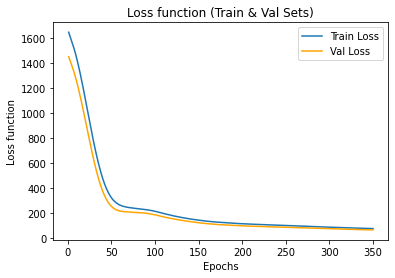

In [ ]:
loss_function = regressor_history.history['loss']
val_loss_function = regressor_history.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Loss function (Train & Val Sets)')
plt.plot(epochs,loss_function,label='Train Loss')
plt.plot(epochs,val_loss_function,color='orange',label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()
plt.show()

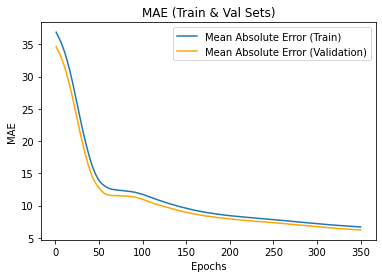

In [ ]:
mae = regressor_history.history['mae']
val_mae = regressor_history.history['val_mae']
epochs = range(1,len(mae)+1)

plt.title('MAE (Train & Val Sets)')
plt.plot(epochs,mae,label='Mean Absolute Error (Train)')
plt.plot(epochs,val_mae,color='orange',label='Mean Absolute Error (Validation)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [ ]:

# load a saved model
#from keras.models import load_model
#saved_model = load_model('best_model.h5')
#regressor.load_weights('/content/gdrive/My Drive/Temp/concrete_weights-250-80.174.hdf5')

In [ ]:
results = regressor.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 64.7952 - mae: 6.1504


In [ ]:
y_test

747    26.06
718    10.35
175    79.30
828    74.99
713     9.69
       ...  
624    27.53
987    33.76
424    33.01
889    33.72
249    13.82
Name: Strength, Length: 206, dtype: float64

In [ ]:
x_test_pattern = X_test[2,:]
y_pred = regressor.predict(x_test_pattern.reshape(1,-1))
print(y_pred[0])

1/1 [==============================] - 0s 43ms/step
[64.55553]


In [ ]:
original_features= min_max_scaler.inverse_transform(x_test_pattern.reshape(1,-1))
original_features

array([[362.6, 189. ,   0. , 164.9,  11.6, 944.7, 755.8,  91. ]])

In [ ]:
x_test_pattern

array([0.59497717, 0.52587646, 0.        , 0.3442492 , 0.36024845,
       0.41773256, 0.40592072, 0.24725275])